0.012684280641790491
13.95270870596954
13.96539298661133
[1.39653930e+01 1.39639976e+01 1.39626022e+01 ... 1.54751015e-02
 1.40796911e-02 1.26842806e-02]


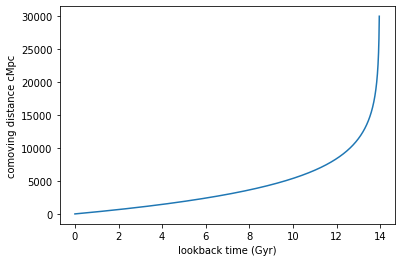

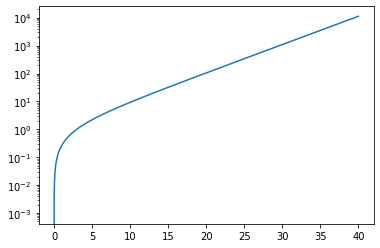

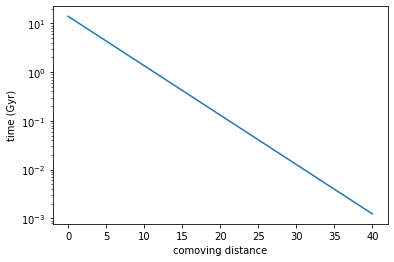

2.2690437601296595e-18


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba.typed import List

# 18/11/2022
# it seems Gabriel's maps have more small scale than me at z=0-4.
# Perhaps Im not accounting properly for the increasing distance?
# Perhaps I need to use the angular diameter distance to do this properly?
# yes that sprobably it. try to compe up with a scheme in which the angular distance scale is better accounted for
# here everythings too bloody euclidian
# how do I check that?
# also, there is the fact that the map of potential is much smoother than the density map (expectdly so)
# although I can check that, looking at the PS of the density map and the potential map, right?

#===============
# and here some functions for lookback time, redshift time conversions etc...
# comoving radial distance

# Some easy vector rotation (although not super efficient)
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))
def vrotate(v,axis,theta):
    M0 = M(axis, theta)
    return dot(M0,v)


# HERE WE WANT TO COMPUTE a and time as a function of position along the LoS
# this requires allxs which is the position along the LoSs in boxsize units
c=3.e8; # m/s
yrinsec=86400*365.25
Gyrinsec=1.e9*yrinsec
Mpcm=3.085e22 # Mpc in m
#pos=allxs*boxsizez0Mpc.value*Mpcm # in m
lookbacktimeBB=13.7e9*86400.*365.25 # s
# yes but no 13.7e9*86400.*365.25 # s is lookbakctimeBB according to LCDM.
# IN Dirac-Milne, lookbacktimeBB is simply:
H0=70.e3/Mpcm # in SI, i.e. in 1/s
lookbacktimeBB=1./H0
AgeU=lookbacktimeBB
lookbacktimenow=0 # s
# in Dirac-Milne, a(t)=adimi*t  where adimi is a constant obtained as
adimi=1./lookbacktimeBB
# yes but lol sincelookbackytimeBB=1./H0 we have
adimi=H0 # and thats it!

#lets define two functions:
# careful here t is age of the universe at time t NOT LOOKBACK TIME
def H(t):
    return 1./t
def aexp(t):
    return H0*t

def gettimea(a):
    return a/H0

def redshift(t):
    # CAREFUL t is TIME NOT LOOKBACK TIME!!
    return 1./aexp(t)-1.

def gettimez(z):
    return gettimea(1./(z+1.))

timeREC=gettimez(1100.)
lookbacktimeREC=lookbacktimeBB-timeREC
print(timeREC/(1.e9*yrinsec))
print(lookbacktimeREC/(1.e9*yrinsec)) # significantly longer than LCDM
print(lookbacktimeBB/Gyrinsec)

def physical_horizon_t(t):
    # physical distance travelled by a photon emitted at time t
    # with t and c in SI
    # how is taht helpful?
    return c*t

# Hubble distance d_H
def d_H(z):
    DH = c/H0
    return DH

# Comoving radial distance for Dirac-Milne
def d_CMR(z):
    DCMR = c/H0*np.log(1+z)
    return DCMR

def redshift_d_CMR(d):
    # compute redshift from comoving distance, reciprocal to d_CMR(z)
    return np.exp(d/(c/H0))-1.


lookbacktimes=np.linspace(lookbacktimenow,lookbacktimeREC,10000)
times=AgeU-lookbacktimes
print(times/Gyrinsec)
aexps=np.logspace(-4,1.,100)
redshifts=1./aexps-1.


#plt.plot(redshifts,d_CMR(redshifts)/Mpcm)
#plt.plot(times/(1.e9*yrinsec),redshift(times))
plt.plot(lookbacktimes/(1.e9*yrinsec),d_CMR(redshift(times))/Mpcm)
plt.xscale('linear')
plt.yscale('linear') 
plt.ylabel('comoving distance cMpc')
plt.xlabel('lookback time (Gyr)')
plt.show()

ds=np.linspace(0.,40.*1.e3*Mpcm,10000)
plt.plot(ds/(1.e3*Mpcm),redshift_d_CMR(ds))
plt.yscale('log')
plt.show()

plt.plot(ds/(1.e3*Mpcm),gettimez(redshift_d_CMR(ds))/Gyrinsec)
plt.yscale('log')
plt.xlabel('comoving distance')
plt.ylabel('time (Gyr)')
plt.show()
# well this last one looks legit



# Will need to make sure my x steppings are always < dx?
# maybe not right now... how do I check that?

print(H0)

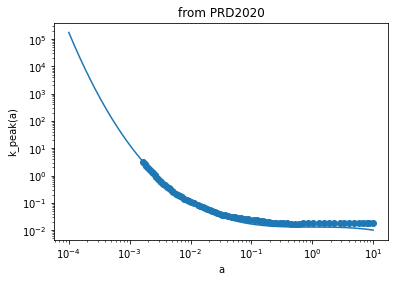

k_peak_norm=  exp(-alpha*log(a)**3)
k_peak_norm(a=1)=  1
exp(2*alpha*log(a)**3)/a
dphi/da /phi0 = 6*alpha*exp(2*alpha*log(a)**3)*log(a)**2/a**2 - exp(2*alpha*log(a)**3)/a**2


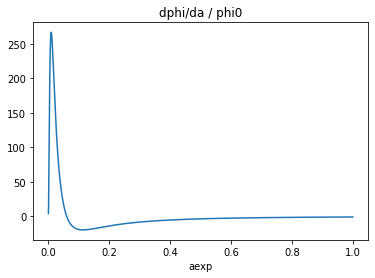

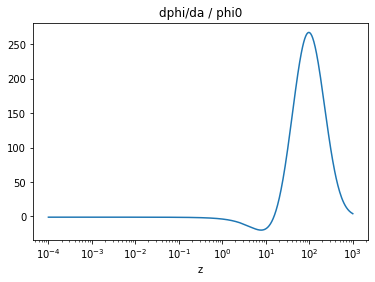

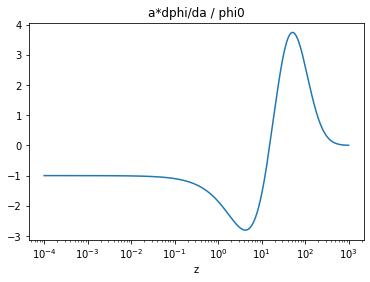

In [468]:
# Check Gabriel's ansatz for kpeak alpha and beta
# Approximate relation between k_peak and scale factor, as predicted from Manfredi et al. (2020)
# Unit of k_peak in 1/Mpc
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

plotPRD2020 = np.loadtxt(np.DataSource().open('kpeak_Dirac_Milne_PRD2020_2.txt'))
a_scale, k_peak = plotPRD2020.T

#k_peak_func = interp1d(a_scale, k_peak, kind='cubic')
a=np.logspace(-4.,1.,1000)

def k_peak_gc(a):
    alphakpn=0.021
    # gabriel's value for alphakpn = 0.021
    return 0.013*np.exp(-alphakpn * np.log(a)**3)

def k_peak_norm(a):
    # thats kpeak/kpeak(a=1)
    alphakpn=0.0213
    return np.exp(-alphakpn * np.log(a)**3)

plt.scatter(a_scale,k_peak)
#plt.plot(a,k_peak_func(a))
plt.plot(a,k_peak_gc(a))
plt.xscale('log')
plt.yscale('log')
plt.title('from PRD2020')
plt.xlabel('a')
plt.ylabel('k_peak(a)')
plt.show()

# and then we compute dphida/phi0 which is only a function of k and a
from sympy.abc import x,y 
from sympy import diff, sin, exp, log
import numpy
from sympy.utilities.lambdify import lambdify
from sympy import symbols

# compute dphi/da
#alphakpn=0.0213
alphakpn= symbols("alpha")
a=symbols("a")
expr = exp(-alphakpn * log(a)**3)
print('k_peak_norm= ',expr)
print('k_peak_norm(a=1)= ',expr.subs(a,1.))
# We have something like phi ~ phi0 * (1/a * 1/k^2)
# so the drivative of that parenthesis wrt a or time is our 1-beta
# so that dphi/da = d/da(1/a * 1/k^2) * phi0
# or dphi/da/phi0 = d/da(1/a * 1/k^2)
expr2 = (1/a)*(1/expr)**2
print(expr2)
ddx=diff(expr2,a)
print('dphi/da /phi0 =',ddx)
dphidasphi0 = lambdify((a, alphakpn), ddx, "numpy")
alphakpn=0.0213
aexps=np.arange(0.001,1.,1.e-4)
plt.plot(aexps,dphidasphi0(aexps,alphakpn))
#plt.xscale('log')
plt.title('dphi/da / phi0')
plt.xlabel('aexp')
plt.show()

plt.plot(1./aexps-1.,dphidasphi0(aexps,alphakpn))
plt.xscale('log')
plt.title('dphi/da / phi0')
plt.xlabel('z')
plt.show()

# this seems to indicate that early times have a much stronger weight than late times.
# however this does not account for the fact that the time spent by the photon in each shell is proportional to a
# so to have a better grasp of the weight of each shell, one needs to multiply the result by a, which gives:

plt.plot(1./aexps-1.,aexps*dphidasphi0(aexps,alphakpn))
plt.xscale('log')
plt.title('a*dphi/da / phi0')
plt.xlabel('z')
plt.show()

# this last *a term will appear when integrating along the LoS



In [3]:
# LOAD SIM DATA
# this is a resource for seeing how to deal with extra particles and fields
#https://yt-project.org/doc/examining/loading_data.html#loading-ramses-data-args
# and fudge box size and particle mass
import yt
import numpy as np
import matplotlib.pyplot as plt
import yt.units


@yt.particle_filter(requires=["particle_tag"], filtered_type='all')
def matter(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_tag")] == 0
    return filter
@yt.particle_filter(requires=["particle_tag"], filtered_type='all')
def antimatter(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_tag")] == 1
    return filter
@yt.particle_filter(requires=["particle_family"], filtered_type='all')
def total(pfilter, data):
    filter = data[(pfilter.filtered_type, "particle_family")] == 1
    return filter

#folder_name_output = "/Volumes/Disque_6To/Simul_Big_Cluster/massive_a_not_prop_t/output_00020/"
folder_name_output = "./data/output_00020/"

ds = yt.load(folder_name_output+'info_00020.txt')
print('Box size ',ds.length_unit/3.0858e24,' pMpc at z=',1./ds.scale_factor -1.) # e24 because length_unit is in cm
print('therefore size = ',ds.length_unit/3.0858e24/ds.scale_factor,' Mpc at z=0')
boxsizez0Mpc=ds.length_unit/3.0858e24/ds.scale_factor
fudgedboxsizez0Mpc=1500.# thats 1.5 Gpc so that the box has ~ 10 BAO scales or so
fudgedboxsizez0m=fudgedboxsizez0Mpc * 3.085e22 # thats 1.5 Gpc so that the box has ~ 10 BAO scales or so
print('Fudged box size = ',fudgedboxsizez0Mpc,' cMpc')


ds.add_particle_filter('matter')
ds.add_particle_filter('antimatter')
ds.add_particle_filter('total')

# LOAD ANTIMATTER
ad = ds.all_data()
amat_x = ad['antimatter', 'particle_position_x']
amat_y = ad['antimatter', 'particle_position_y']
amat_z = ad['antimatter', 'particle_position_z']
amat_vx = ad['antimatter', 'particle_velocity_x']
amat_vy = ad['antimatter', 'particle_velocity_y']
amat_vz = ad['antimatter', 'particle_velocity_z']

amat_m = ad['antimatter', 'particle_mass']
aptype = ad['antimatter', 'particle_tag'] # 0 pour la matière et 1 pour l'antimatière

print( "Masse particule 1 antimatière (M_sol)", amat_m[1].value/1.99E33)
fudgedmpartMsol=((amat_m[1].value/1.99E33)*(fudgedboxsizez0Mpc/boxsizez0Mpc)**3).value
print(  "Fudged antimatter particle mass (Msol)", fudgedmpartMsol)

# LOAD MATTER
ad = ds.all_data()
mat_x = ad['matter', 'particle_position_x']
mat_y = ad['matter', 'particle_position_y']
mat_z = ad['matter', 'particle_position_z']
mat_vx = ad['matter', 'particle_velocity_x']
mat_vy = ad['matter', 'particle_velocity_y']
mat_vz = ad['matter', 'particle_velocity_z']
mat_m = ad['matter', 'particle_mass']
ptype = ad['matter', 'particle_tag'] # 0 pour la matière et 1 pour l'antimatière

print( "Masse particule 1 matière (M_sol)", mat_m[1].value/1.99E33)


yt : [INFO     ] 2022-11-10 14:06:22,150 Parameters: current_time              = 0.9319906352218505
yt : [INFO     ] 2022-11-10 14:06:22,152 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-11-10 14:06:22,154 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-11-10 14:06:22,156 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-11-10 14:06:22,157 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-11-10 14:06:22,157 Parameters: current_redshift          = 0.9546589796203004
yt : [INFO     ] 2022-11-10 14:06:22,158 Parameters: omega_lambda              = 0.0
yt : [INFO     ] 2022-11-10 14:06:22,158 Parameters: omega_matter              = 1.0
yt : [INFO     ] 2022-11-10 14:06:22,159 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2022-11-10 14:06:22,159 Parameters: hubble_constant           = 0.7


Box size  28.282949012158664 cm  pMpc at z= 0.9546589796203004
therefore size =  55.28352025675904 cm  Mpc at z=0
Fudged box size =  1500.0  cMpc


yt : [WARNING  ] 2022-11-10 14:06:30,833 This output has no cooling fields
yt : [INFO     ] 2022-11-10 14:06:31,459 Adding particle_type: DM
yt : [INFO     ] 2022-11-10 14:06:31,475 Adding particle_type: star
yt : [INFO     ] 2022-11-10 14:06:31,491 Adding particle_type: cloud
yt : [INFO     ] 2022-11-10 14:06:31,510 Adding particle_type: dust
yt : [INFO     ] 2022-11-10 14:06:31,529 Adding particle_type: star_tracer
yt : [INFO     ] 2022-11-10 14:06:31,546 Adding particle_type: cloud_tracer
yt : [INFO     ] 2022-11-10 14:06:31,565 Adding particle_type: dust_tracer
yt : [INFO     ] 2022-11-10 14:06:31,585 Adding particle_type: gas_tracer


Masse particule 1 antimatière (M_sol) 1369844750.4644756
Fudged antimatter particle mass (Msol) 27362643880707.78
Masse particule 1 matière (M_sol) 1369844750.4644756


In [4]:
# Build matter and antimatter grid using 3d histogram
grid_size = 256 # is arbitrary since we're using particles...
#am_grid = np.zeros((grid_size, grid_size, grid_size), dtype=int)
nb_am = amat_x.size
print("Nb de particules antimatière : ", nb_am)
xgrid_am = amat_x.value*grid_size
ygrid_am = amat_y.value*grid_size
zgrid_am = amat_z.value*grid_size

xgrid_am = xgrid_am.astype(int)
ygrid_am = ygrid_am.astype(int)
zgrid_am = zgrid_am.astype(int)

am_grid,bins=np.histogramdd(([xgrid_am,ygrid_am,zgrid_am]),bins=256)

print('total parts m_grid',np.sum(am_grid.flatten()))
#print('original number of parts',nb_am)

nb_m = mat_x.size
print("Nb de particules matière : ", nb_m)
xgrid_m = mat_x.value*grid_size
ygrid_m = mat_y.value*grid_size
zgrid_m = mat_z.value*grid_size

xgrid_m = xgrid_m.astype(int)
ygrid_m = ygrid_m.astype(int)
zgrid_m = zgrid_m.astype(int)

m_grid,bins=np.histogramdd(([xgrid_m,ygrid_m,zgrid_m]),bins=256)

print('total parts m_grid',np.sum(m_grid.flatten()))
#print('original number of parts',nb_m)

Nb de particules antimatière :  8388075
total parts m_grid 8388075.0
Nb de particules matière :  8389141
total parts m_grid 8389141.0


In [115]:
# SOME FUNCTIONS FOR 
# COMPUTE POTENTIAL
# lets follow https://astro.uchicago.edu/~andrey/talks/PM/pm_slides.pdf
# AND TILING to account for decreasing PBAO scale
from joblib import Parallel, delayed
#from numba import jit
import numba
from numba.typed import List
# NOTE: to accelerate with numba, it is required to create the results arrays such as G and phi OUTSIDE of the function, 
# and pass as argument. Otherwise numba has trouble dealing with numpy.ndarray or np.zeros or nb.empty

#a=np.random.normal(size=[nx,nx,nx])

#@numba.jit(nopython=True, parallel=True)
@numba.jit(nopython=True)
def Greene(l,m,n,nx):
#    l,m,n=k
#    l=k[0]
#    m=k[1]
#    n=k[2]
    if((l+m+n)==0): return 0
    L=nx
    kx=2.*np.pi*l/L
    ky=2.*np.pi*m/L
    kz=2.*np.pi*n/L
    G=np.sin(kx/2.)**2+np.sin(ky/2.)**2+np.sin(kz/2.)**2
    return -1./G

#Greene(0,0,0,256)

#@numba.jit(nopython=True, parallel=True)
def ComputePotential(a,method='disc'):
    # Compute potential from density distribution a
    # but be careful at this stage it should really be overdensity distribution, not density!!
    # following https://astro.uchicago.edu/~andrey/talks/PM/pm_slides.pdf
    # after some research I gound that
    # ComputePotential yields 4*nx**2 *phi where phi is the solution to eq. laplacian(phi)=a

    
    nx=len(a[0])

    #a=a-a.mean() # can do or not
    fa=np.fft.fftn(a)
    
    # compute phi^
    #iphi=np.zeros([nx,nx,nx])
    iphi=fa*0.
    
    freqs=np.fft.fftfreq(nx)

    for m in range(0,nx):
        if(m%50==0):
            print('Greening slice ',m)
        for n in range(0,nx):
            for p in range(0,nx):
                #if((m+n+p)==0):
                if((m==0)&(n==0)&(p==0)):
                    iphi[m,n,p]=0.
                if((m!=0)|(n!=0)|(p!=0)):
                    if(method=='green'):
                        iphi[m,n,p]=Greene(m,n,p,nx)*fa[m,n,p]  # using green function as in kravtsov
                    if(method=='disc'):
                        iphi[m,n,p]=-(1./(freqs[m]**2+freqs[n]**2+freqs[p]**2))*fa[m,n,p]   # just doing the discrete thing

    phi=np.fft.ifftn(iphi).real
#    phi=np.fft.ifftn(iphi)
    return phi

#@numba.jit(nopython=True, parallel=True)
def ComputeGreeneMatrix(nx):
    #G=np.zeros([nx,nx,nx])
    nx3 = [nx, nx, nx]
    typed_nx3 = List()
    [typed_nx3.append(x) for x in nx3]
#    G=np.empty(typed_nx3)
    G=np.ndarray(typed_nx3,dtype=float)
    for i in range(0,nx):
        if(i%50==0):
            print('Greening slice ',i)
        for j in range(0,nx):
            for k in range(0,nx):
                G[i,j,k]=Greene(i,j,k,nx)
    return G
    
def ComputeGreeneMatrixParallel(nx):
    # using parallel
    # not getting any speedup with this
    
    results = Parallel(n_jobs=2,verbose=1)(delayed(ComputeGreeneCoef)(i) for i in range(int(nx**3))) 
    return np.reshape(results,[nx,nx,nx])
    
def ComputeGreeneCoef(coefnumber):
    # requires nx to be defined globally
    coefnumber=int(coefnumber)
    k=int(coefnumber%nx)
    j=int(((coefnumber-k)/nx)%nx)
    i=int((coefnumber-k)/nx**2)
#    print(i,j,k)
    return Greene(i,j,k,nx)

def ComputePotentialParallel(a):
    # Compute potential from mass distribution a
    # following https://astro.uchicago.edu/~andrey/talks/PM/pm_slides.pdf

    nx=len(a[0])

    #a=a-a.mean() # can do or not
    fa=np.fft.fftn(a)

    # compute phi^
    #iphi=np.zeros([nx,nx,nx])
    iphi=fa*0.
     
    for i in range(0,nx):
        if(i%50==0):
            print('Greening slice ',i)
        for j in range(0,nx):
            for k in range(0,nx):
                iphi[i,j,k]=Greene(i,j,k,nx)*fa[i,j,k]

    phi=np.fft.ifftn(iphi).real
    return phi

    
# this below with numba works very well

@numba.jit(nopython=True, parallel=True)
def OtherComputeGreeneMatrix(nx,G):
    for i in range(0,nx):
        if(i%50==0):
            print('Greening slice ',i)
        for j in range(0,nx):
            for k in range(0,nx):
                G[i,j,k]=Greene(i,j,k,nx)
#nx=256
#G=np.zeros([nx,nx,nx])
#Go=OtherComputeGreeneMatrix(nx,G)
#Note that for numba to work well one has to pass G to function as argument rather than creating G inside of function, 
# which numba doesnt like (does not like np.ndarray or np.zeros or np.empty)

    
    
    
#if(1):
    #a=np.zeros([nx,nx,nx])
    #a[int(nx/2),int(nx/2),int(nx/2)]=1.
    #a[int(nx/3),int(nx/3),int(nx/3)]=1.
    #a[int(nx/4),int(nx/2),int(nx/3)]=1.
    #a=am_grid

#i=4
#fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
#fig.suptitle('Horizontally stacked subplots')
#ax1.imshow(a[i,:,:])
#ax2.imshow(np.log10((phi[i,:,:]).real))
#ax3.imshow((abs(iphi[i,:,:])))

#test parallel, not great:
#import timeit
#nx=grid_size
#starttime = timeit.default_timer()
#print("The start time is :",starttime)
#Gpar=ComputeGreeneMatrixParallel(nx)
#print("The time difference is :", timeit.default_timer() - starttime)

#starttime = timeit.default_timer()
#print("The start time is :",starttime)
#Gser=ComputeGreeneMatrix(nx)
#print("The time difference is :", timeit.default_timer() - starttime)

print(fudgedboxsizez0Mpc)
print(Mpcm)
print(fudgedmpartMsol)

import skimage.transform as skt

def tile_downscale(a,dsfactor):
    # returns a new cube where a is used as main pattern, downscaled in size by dsfactor,
    # repeated dsfactor times to fill to the size of the original cube a
    # output is NOT expected to be periodic in general
    # NB: a must be a CUBE (size n**3)
    
    grid_size=np.shape(a)[1]
    newsize=int(grid_size/dsfactor) # yes its brutal
    if(newsize==0):
        newsize=1
    
    #resized= skt.resize(mphi,(newsize,newsize,newsize))
    resized= skt.resize_local_mean(a,(newsize,newsize,newsize))
    reslen=np.shape(resized)[1]
    tile=np.pad(resized,((grid_size-reslen,0),(grid_size-reslen,0),(grid_size-reslen,0)),mode='wrap')
    return tile




1500.0
3.085e+22
27362643880707.78


In [6]:
# first 2 lines are test. Comment them when not test
#am_grid=0.*am_grid
#am_grid[0,0,0]=1.

# well need to compute potential from DENSITY grid, hence 2.e30*fudgedmpartMsol/dx**3 factor
# the (fudgedboxsizez0Mpc*Mpcm)**2/(4*grid_size**2) is the normalization found in normalization_potential_computation
# to correct the kravstosv ComputePotential method
# potential computed in comoving coords => will need to correct by 1/a (because of boxsize**2/dx**3)

Mpcm=3.085e22 # Mpc in m
GSI=6.67e-11 # G in SI
dx=fudgedboxsizez0Mpc*Mpcm/grid_size
#print(grid_size," comoving meter")
print('grid_size ',grid_size,' cells')
print(float(dx))
aphi=GSI*4.*np.pi*ComputePotential(am_grid*(2.e30*fudgedmpartMsol/dx**3),method='green')*(fudgedboxsizez0Mpc*Mpcm)**2/(4.*grid_size**2) # antimatter
mphi=GSI*4.*np.pi*ComputePotential(m_grid*(2.e30*fudgedmpartMsol/dx**3),method='green')*(fudgedboxsizez0Mpc*Mpcm)**2/(4.*grid_size**2) # matter 

# the result is a potential in SI for a box of size fudgedboxsizez0Mpc



grid_size  256  cells
1.8076171874999998e+23
Greening slice  0
Greening slice  50
Greening slice  100
Greening slice  150
Greening slice  200
Greening slice  250
Greening slice  0
Greening slice  50
Greening slice  100
Greening slice  150
Greening slice  200
Greening slice  250


<ipython-input-609-fbfc38c57900>:9: RuntimeWarning: divide by zero encountered in log10
  im=axes[1,1].imshow(np.log10(m_grid[i,:,:]))


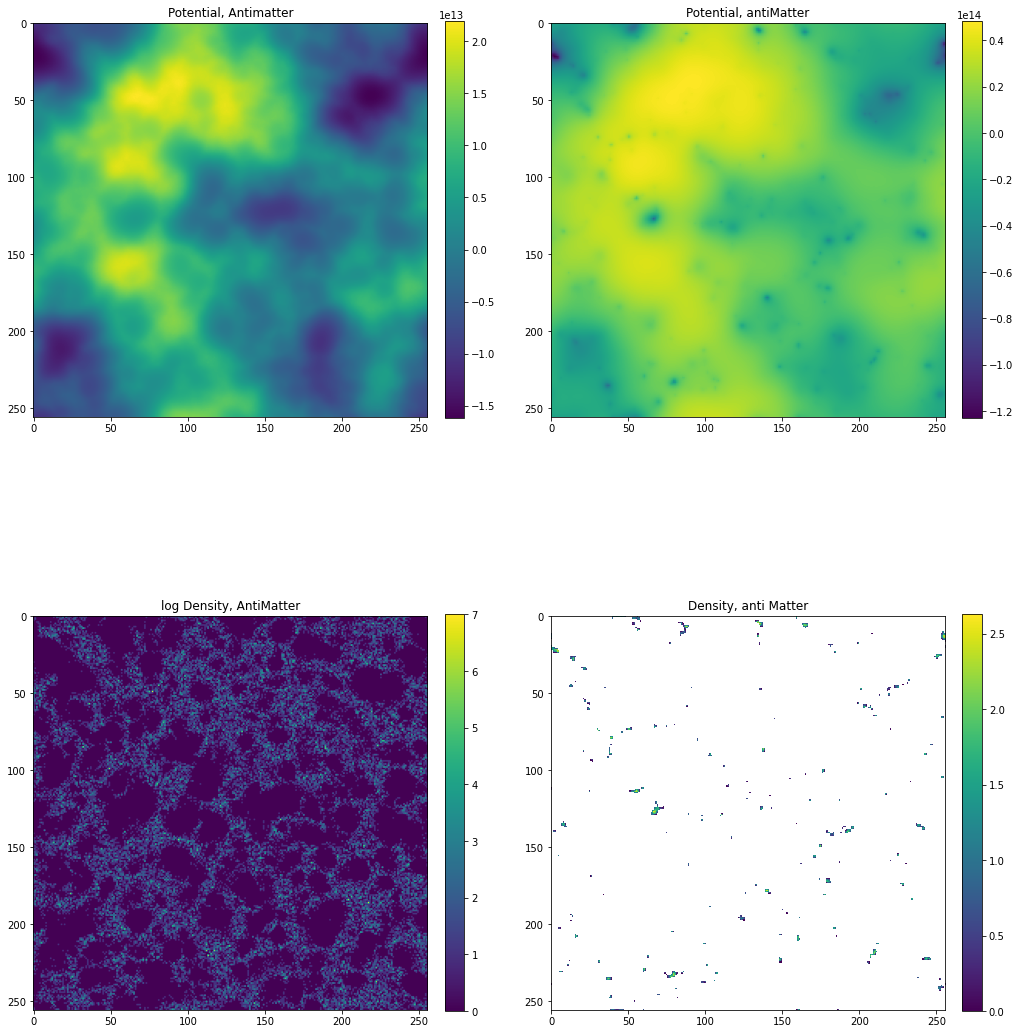

In [609]:
i=50
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 20))
im=axes[0,0].imshow(-aphi[i,:,:])
axes[0,0].set_title('Potential, Antimatter')
fig.colorbar(im,ax=axes[0,0],fraction=0.046, pad=0.04)
im=axes[0,1].imshow(mphi[i,:,:])
axes[0,1].set_title('Potential, antiMatter')
fig.colorbar(im,ax=axes[0,1],fraction=0.046, pad=0.04)
im=axes[1,1].imshow(np.log10(m_grid[i,:,:]))
axes[1,1].set_title('Density, anti Matter')
fig.colorbar(im,ax=axes[1,1],fraction=0.046, pad=0.04)
im=axes[1,0].imshow((am_grid[i,:,:]))
axes[1,0].set_title('log Density, AntiMatter')
fig.colorbar(im,ax=axes[1,0],fraction=0.046, pad=0.04)
plt.show()


27431


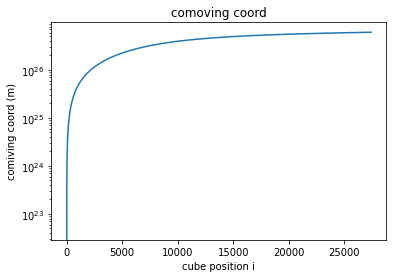

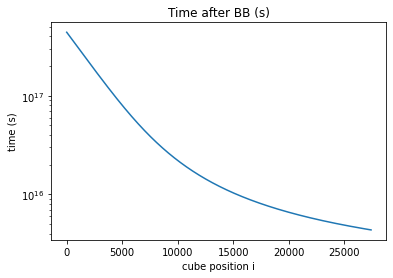

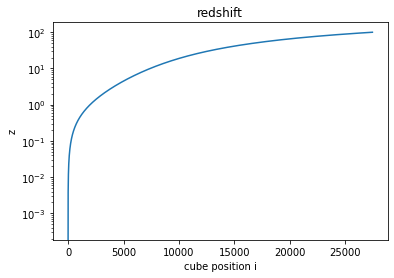

In [305]:
# Definition of LoS classes
# & Integration of potential
class los:  # line of sight
    start = np.full([3],0.5)
    npoints = int(1000)
    nstart=500 # not used because numba
    # beware nend not necessarily consistent with nend if entered by hand
    nend=nstart+npoints # not used because numba    
    step=0.0005
    direction= np.full([3],0.1)
    allxs=np.zeros(npoints)
    crdm=np.zeros(npoints)
    zs=np.zeros(npoints)
    times=np.zeros(npoints)
    aexps=np.zeros(npoints)
    dxphys=np.zeros(npoints)
    boxsizez0m=64.*Mpcm # m, to be changed to fudgedboxdizez0m (in meters)
    def compute_lincoord(self):
        # this method returns the 1d position, time and redshifts of the los using step and npoints
        self.allxs=(nstart+np.arange(0,self.npoints,1))*self.step
        self.crdm=self.allxs * self.boxsizez0m # comoving radial distance of each sample
        self.zs=redshift_d_CMR(self.crdm) # redshift from comoving radial distance
        self.times=gettimez(self.zs)
        self.aexps=1./(self.zs+1.)
        self.dxphys=self.step*self.boxsizez0m*self.aexps
        
# below is a class to try out accounting for a pBAO-scaled coordinate 
# this circumvents the need for generating shrunk-tiled cubes, which is numercially not great
# and generates artefacts
# the idea is that whenever the the structure is 2 times smaller than at z=0
# instead of shrink-tiling the cube, one can simply put it further away, at a distance such that its angular size is 2 times smaller
# but for that one needs to consider 3 different sets of coords:
# 1 - the cube coord that has a constant step
# 2 - the comoving coord which has an evolving step because of the shrinking 1/k_peak_norm
# 3 - the physical coord to which we can always go back to
# ok so this class is able to compute the comoving coord and z for all its points 
# from a constant step in cube coords

class los2:  # line of sight
    # beware this LOS must always start with nstart=0 otherwise compute_lincoord is all wrong
    # because its an integral
    start = np.full([3],0.5)
    npoints = int(1000)
    nstart=0
    # beware nend not necessarily consistent with nend if entered by hand
    nend=nstart+npoints # not used because numba    
    step=0.001
    direction= np.full([3],0.1)
    boxsizez0m=64.*Mpcm # m, to be changed to fudgedboxdizez0m (in meters)
    maxz=100.
    def compute_lincoord(self):
        # this method returns the 1d position, time and redshifts of the los using step and npoints
        # also resets dimension of los to match maxz
        self.allxs=np.zeros(self.npoints)  # position in cube coord
        self.allsc=np.zeros(self.npoints)  # s coord comoving
        self.allsp=np.zeros(self.npoints)  # s coord physical
        self.crdm=np.zeros(self.npoints)
        self.zs=np.zeros(self.npoints)
        self.times=np.zeros(self.npoints)
        self.aexps=np.zeros(self.npoints)
        self.dxphys=np.zeros(self.npoints)
        self.nend=self.nstart+self.npoints 

        # initializs support in cube coords
        self.allxs=(nstart+np.arange(0,self.npoints,1))*self.step
        # initialize other fields to start integration
        aexp=1.
        z=0.
        sc=0. # comoving cooord
        self.allsc[0]=0.
        self.zs[0]=0.
        self.aexps[0]=1.
        
        # integrate Euler explicit like a sagouin
        for i in range(1,self.npoints): 
            # sc comoving coord step is getting shorter for a constant step in cube coord
            dsc=self.step * self.boxsizez0m * 1./(k_peak_norm(aexp)/k_peak_norm(1.))
            # sp physical coord
            dsp=dsc*aexp
            sc=sc+dsc
            z=redshift_d_CMR(sc)
            if(z>self.maxz):
                self.npoints=i
                self.nend=i
                break
            aexp=1./(z+1.)
            self.allsc[i]=sc
            self.zs[i]=z
            self.aexps[i]=aexp # need aexp to compute the next dsc because of k_peak(a)

        # trim all arrays back to maxz
        self.allxs=self.allxs[:self.npoints]
        self.allsc=self.allsc[:self.npoints]  # s coord comoving
        self.zs=self.zs[:self.npoints]
        self.aexps=self.aexps[:self.npoints]
        self.times=gettimez(self.zs)
        
# test
l2=los2()
#l2.npoints=9210 # for the box size used this is the max
l2.npoints=30000
l2.boxsizez0m=fudgedboxsizez0m
l2.compute_lincoord()
print(l2.npoints)

#plt.plot(l2.times)
plt.plot(l2.allsc)
plt.yscale('log')
plt.title('comoving coord')
plt.xlabel('cube position i')
plt.ylabel('comiving coord (m)')
plt.show()
plt.plot(l2.times)
plt.title('Time after BB (s)')
plt.xlabel('cube position i')
plt.ylabel('time (s)')
plt.yscale('log')
plt.show()
plt.plot(l2.zs)
plt.yscale('log')
plt.title('redshift')
plt.ylabel('z')
plt.xlabel('cube position i')
plt.show()   
    
#@numba.jit(nopython=True, parallel=True)
def getlosvalues(a,l1,period=256): # returns all values in cube a found along the LoS

    if(type(l1) != los):
        print( 'ERROR input los is not a los class')
    start=l1.start
    step=l1.step
    npoints=int(l1.npoints)
    nx=len(a[0])
    # normalize direction
    direction=l1.direction
    direction = direction / np.sqrt(direction[0]**2+direction[1]**2+direction[2]**2)
    l1.direction=direction
    allpoints= np.zeros([3,npoints])
    allcells= np.zeros([3,npoints],dtype=int)
    allvalues= np.zeros(npoints)
    allxs=np.zeros(npoints)

    for i in range(0,npoints):
        for j in range(0,3):
            allpoints[j,i]=start[j]+direction[j]*step*i
            if(period!=0):
                allcells[j,i]=int(allpoints[j,i] * nx)%period
            else:
                allcells[j,i]=int(allpoints[j,i] * nx)
        allvalues[i]=a[allcells[0,i],allcells[1,i],allcells[2,i]]
        # abcissa along LoS, this below is ok BECAUSE direction is normalized
        allxs[i]=step*i

    l1.allvalues=allvalues
    l1.allxs=allxs
    return
#    return allvalues
 
@numba.jit(nopython=True, parallel=True)
def numbagetlosvalues(a,start,step,nstart,npoints,direction,allpoints,allcells,allvalues,allxs,period=256,rollxyz=np.full([3],0),xyzdir=np.full([3],1)): # returns all values in cube a found along the LoS
    # xyzdir is direction of parcours +1 or -1
    nx=len(a[0])
    
    # normalize direction if not normalized
    direction = direction / np.sqrt(direction[0]**2+direction[1]**2+direction[2]**2)

    for i in range(0,npoints):
        for j in range(0,3):
            allpoints[j,i]=start[j]+direction[j]*xyzdir[j]*step*(i+nstart) + rollxyz[j]
            if(period!=0):
                allcells[j,i]=int(allpoints[j,i] * nx)%period
            else:
                allcells[j,i]=int(allpoints[j,i] * nx)
        allvalues[i]=a[allcells[0,i],allcells[1,i],allcells[2,i]]
        # abcissa along LoS, this below is ok BECAUSE direction is normalized
        allxs[i]=step*i

#    l1.allvalues=allvalues
    losvalues=allvalues
    losxs=allxs
    return    
    



Approximate resolution at NSIDE 512 is 0.11 deg
3145728


3145728

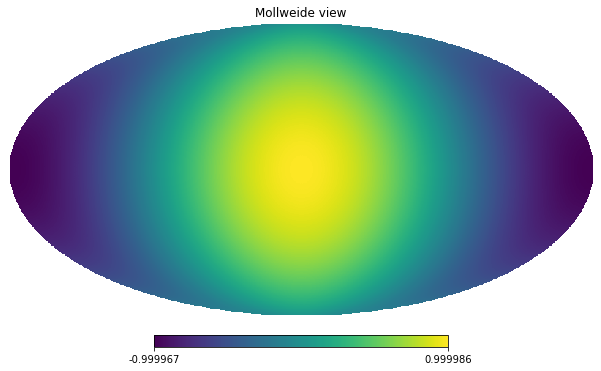

In [610]:
# HealPix Tools for Angular Power spectrum
import healpy as hp
from skimage.transform import downscale_local_mean, rescale, resize ## rescale, resize NOT CONSERVATIVE
from astropy import units

power = 9

# NOTE: number of cells = 12*(2**(power))**2
# NOTE: Carbone 2008 uses NSIDE=2048, i.e. 1.72'

NSIDE = 2**power
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

# This is the ordering (RING) expected by the healpy module and in particular the power spectrum module
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

theta, phi = hp.pix2ang(nside=NSIDE, ipix=np.arange(NPIX) )
vec=hp.ang2vec(theta, phi)
#check
hp.mollview(vec[:,0]) 
len(vec[:,0])

[0.8763951  0.27594228 0.47020307]
l1.allxs  [0.00000000e+00 6.51041667e-04 1.30208333e-03 ... 2.49980469e+01
 2.49986979e+01 2.49993490e+01]
[0 0 0]
allxs from getlosvalues [0.00000000e+00 6.51041667e-04 1.30208333e-03 ... 2.49980469e+01
 2.49986979e+01 2.49993490e+01]
[0.00000000e+00 3.01269531e+22 6.02539062e+22 ... 1.15678462e+27
 1.15681475e+27 1.15684487e+27]
[0.00000000e+00 2.27890546e-04 4.55833027e-04 ... 6.30537564e+03
 6.30681280e+03 6.30825029e+03]
total deltaT/T
0.0001999813099961367
check that the total integration time is indeed the age of the Universe
0.999955457238859


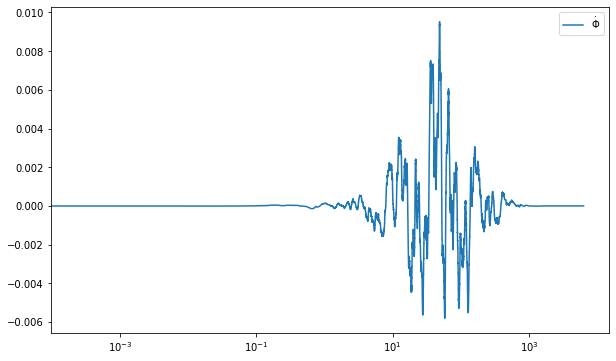

fudgeboxsizez0m  4.6274999999999995e+25
los.boxsizez0m  4.6274999999999995e+25
times after getlosvalues  38400 [4.40714286e+17 4.40613874e+17 4.40513485e+17 ... 6.98839256e+13
 6.98680033e+13 6.98520847e+13]
times from los class  38400 [4.40714286e+17 4.40613874e+17 4.40513485e+17 ... 6.98839256e+13
 6.98680033e+13 6.98520847e+13]
crdm after getlosvalues  38400 [0.00000000e+00 3.01269531e+22 6.02539062e+22 ... 1.15678462e+27
 1.15681475e+27 1.15684487e+27]
crdm from los class  38400 [0.00000000e+00 3.01269531e+22 6.02539062e+22 ... 1.15678462e+27
 1.15681475e+27 1.15684487e+27]
dxphis after getlosvalues  38400 [3.01269531e+22 3.01200890e+22 3.01132265e+22 ... 4.77722148e+18
 4.77613304e+18 4.77504485e+18]
dxphis from los class  38400 [3.01269531e+22 3.01200890e+22 3.01132265e+22 ... 4.77722148e+18
 4.77613304e+18 4.77504485e+18]


In [158]:
# checking one LoS to see what a the signal comes from
# lets use formula 9 from Watson2014
# https://arxiv.org/pdf/1307.1712.pdf
# thats phidot = -phi H(t) (1-beta(t))

l1=los()
nstart=0


l1.direction=np.asarray([0.3,0.1,0.])
l1.direction=np.random.uniform(0.,1.,size=[3])
print(l1.direction)

losxs=np.zeros(l1.npoints)
allvalues= np.zeros(l1.npoints)

# numba - accelerated
ilos=np.zeros(len(vec))
#l1.npoints = 3.*grid_size/2 # slight oversampling
#l1.step=0.5/l1.npoints
dist=25. # length of rays in box units 
l1.npoints=int(dist*6.*grid_size) # slight oversampling
l1.step=dist/l1.npoints
losvalues=np.zeros(l1.npoints)
losxs=np.zeros(l1.npoints)
l1.boxsizez0m=fudgedboxsizez0m
l1.nstart=nstart
l1.compute_lincoord()
print('l1.allxs ',l1.allxs)

npoints=l1.npoints
allpoints= np.zeros([3,npoints])
allcells= np.zeros([3,npoints],dtype=int)
allvalues= np.zeros(npoints)
allxs=np.zeros(npoints)
rollxyz=np.full([3],0)
#rollxyz=np.random.uniform(0,255,size=[3])
print(rollxyz)
period=256

numbagetlosvalues(aphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlospot=np.copy(allvalues)
numbagetlosvalues(mphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlospot=np.copy(allvalues)
numbagetlosvalues(m_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlosdens=np.copy(allvalues)
numbagetlosvalues(am_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlosdens=np.copy(allvalues)

print('allxs from getlosvalues',allxs)
print(allxs * fudgedboxsizez0m)
crdm=allxs * fudgedboxsizez0m # comoving radial distance of each sample
zs=redshift_d_CMR(crdm) # redshift from comoving radial distance
times=gettimez(zs)
aexps=1./(zs+1.)
print(zs)
rho0baram=2. # for antimatter
GSI=6.67e-11 # G in SI
cSI=3.e8# c in SI

dxphis=l1.step*fudgedboxsizez0Mpc*Mpcm*aexps # this is the physical dx corresponding to each segment
#dxphis=1.

plt.figure(figsize=(10, 6))
# to account for the non-unity size of the box, phi has to be corrected by * (dx*a)**2  (the physical size of cells**2)
# cant really work out if it should be dx**2 or L**2....
# weel I think its dx**2. Imagint you have a distribution of delta(i,j,k) and you want to compute the potential 
# via brute force: for cell i,j,k, the potential is the sum of the potentials contributed by all other cells:
# phi(i,j,k)= sum _l,m,n -G rho(l,m,n)dx**3 / ( sqrt((i-l)**2+(j-m)**2+(k-n)**2)*dx)
# so that the dx**2 factor comes out
# also its logical because the laplacian operator is a dx**2 as well
# but at the end I found its a full boxsize**2 as shown in normalization_potential notebook
# then to account for the fact that density increases because of cosmology as a-3 
# but potential normalization goes as boxsize**2/dx**3, boxsize and dx in physical => thats 1/a

# with Gabriel's ansatz for k_peak and beta
# matter
phidot=-(mlospot/aexps)*H(times)*(1-beta(aexps))*(k_peak_norm(1.)/k_peak_norm(aexps))**2
# antimatter: beta=0 because very early on density overdensity settles to about ~2 very early on and evolves only in scale
phidot=-(amlospot/aexps)*H(times)*(1.-0.*beta(aexps))*(k_peak_norm(1.)/k_peak_norm(aexps))**2

print('total deltaT/T')
print(np.sum(phidot*(dxphis/cSI)*(2./cSI**2)))

print('check that the total integration time is indeed the age of the Universe')
print(np.sum(dxphis/cSI)*H0)


#phidot=-amlospot*(1-beta(times))

plt.plot(1./(aexps)-1.,phidot,label='$\dot{\Phi}$')
plt.legend()
plt.xscale('log')
plt.show()

print('fudgeboxsizez0m ',fudgedboxsizez0m)
print('los.boxsizez0m ',l1.boxsizez0m )

print('times after getlosvalues ',len(times),times)
print('times from los class ',len(l1.times),l1.times)

print('crdm after getlosvalues ',len(crdm),crdm)
print('crdm from los class ',len(l1.crdm),l1.crdm)

print('dxphis after getlosvalues ',len(dxphis),dxphis)
print('dxphis from los class ',len(l1.dxphys),l1.dxphys)

# im still not as high as Gabriel but almost there? multuplying by nx**2 would bring me into the few 10s of microK
# but I dont see a justification for that.
# oooor whats missing is a super large and variable beta(t)... hard to have that...


253
startdist  9.0
nstart 6899.999999999999
l1.allxs  [9.         9.00130435 9.0026087  9.00391304 9.00521739 9.00652174
 9.00782609 9.00913043 9.01043478 9.01173913 9.01304348 9.01434783
 9.01565217 9.01695652 9.01826087 9.01956522 9.02086957 9.02217391
 9.02347826 9.02478261 9.02608696 9.0273913  9.02869565 9.03
 9.03130435 9.0326087  9.03391304 9.03521739 9.03652174 9.03782609
 9.03913043 9.04043478 9.04173913 9.04304348 9.04434783 9.04565217
 9.04695652 9.04826087 9.04956522 9.05086957 9.05217391 9.05347826
 9.05478261 9.05608696 9.0573913  9.05869565 9.06       9.06130435
 9.0626087  9.06391304 9.06521739 9.06652174 9.06782609 9.06913043
 9.07043478 9.07173913 9.07304348 9.07434783 9.07565217 9.07695652
 9.07826087 9.07956522 9.08086957 9.08217391 9.08347826 9.08478261
 9.08608696 9.0873913  9.08869565 9.09       9.09130435 9.0926087
 9.09391304 9.09521739 9.09652174 9.09782609 9.09913043 9.10043478
 9.10173913 9.10304348 9.10434783 9.10565217 9.10695652 9.10826087
 9.10956522 9.1

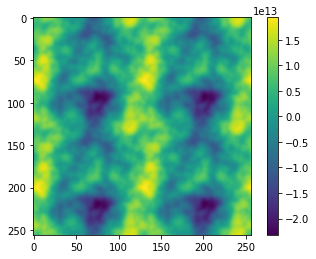

rollxyz  [ 67.64326923  10.85806514 123.77342869]
xyzdir  [ 1 -1 -1]
[0.5 0.5 0.5]
random rotation axis, angle  [ 0.2804551  -0.8489497   0.44791667] 19.08130492379168
0 %
20 %
40 %
60 %
80 %
100 %
done


In [337]:
# Using method 1, i.e. los, i.e. Downscaling & tiling potential to account for the decrease of the pBAO scale (k increase)
# here the cube coord is the comoving coord
# numba - accelerated - this is for comupting for the whole sphere
ilos=np.zeros(len(vec))
ilosds=np.zeros(len(vec))
l1=los()
#l1.npoints = 3.*grid_size/2 # slight oversampling
#l1.step=0.5/l1.npoints
dist=0.33 # length of rays in box units v (boxsize ~ 55 Mpc) => thats ~5cGpc
l1.npoints=int(dist*3.*grid_size) # slight oversampling here
l1.step=dist/l1.npoints
l1.boxsizez0m=fudgedboxsizez0m
losvalues=np.zeros(l1.npoints)
losxs=np.zeros(l1.npoints)

print(l1.npoints)

npoints=l1.npoints
allpoints= np.zeros([3,npoints])
allcells= np.zeros([3,npoints],dtype=int)
allvalues= np.zeros(npoints)
allxs=np.zeros(npoints)
startdist=9.
nstart=startdist/l1.step
l1.nstart=int(nstart)
print('startdist ',startdist)
print('nstart',nstart)
l1.compute_lincoord()
print('l1.allxs ',l1.allxs)
print('l1.crdm ',l1.crdm)
print('l1.times' ,l1.times)
print('l1.aexps ',l1.aexps)
print('l1.zs ',l1.zs)
print('Average redshift of slice ',np.mean(l1.zs))
#print('PBAO scale factors k_peak_norm ',k_peak_norm(l1.aexps))
avgPBAOdownscale=np.mean(k_peak_norm(l1.aexps))
print('Using average PBAO scale factor = ',avgPBAOdownscale)
print('Downscaling & tiling aphi')
#avgPBAOdownscale=4
dsaphi=tile_downscale(aphi,avgPBAOdownscale)
plt.imshow(dsaphi[:,:,0])
plt.colorbar()
plt.show()

reroll=1 # reroll=0 to keep a given random orientation
if(reroll==1):
    rollxyz=np.full([3],0)
    rollxyz=np.random.uniform(0,255,size=[3])
    xyzflip=np.random.randint(0,2,size=[3])
    xyzdir=np.full([3],1)
    # manage flip
    for i in range (0,3):
        if (xyzflip[i]==1):
            xyzdir[i]=-1.

if(reroll==0):
    rollxyz=np.full([3],0)
    xyzdir=np.full([3],1) 
        
#rollxyz=np.full([3],0)
print('rollxyz ',rollxyz)
print('xyzdir ',xyzdir)
period=256
print(l1.start)
# setup a random rotation
rotaxis=vec[np.random.randint(0,len(vec),1)][0]
angle=np.random.uniform(0,360,size=1)[0]
#angle=0.
print('random rotation axis, angle ',rotaxis,angle)
# generate rotation matrix M0:
M0 = M(rotaxis, angle)

#rotated=np.copy(aphi)
nv=len(vec)
nshowsteps=int(5)
showsteps=int(nv/nshowsteps)
for i in range(0,len(vec)):
    if((i%showsteps)==0): 
        print(int(np.rint((i/len(vec))*100.)),"%")
# get direction from healpy vec:        
    l1.direction=vec[i]
# apply random rotation of direction:
#    l1.direction=vrotate(l1.direction,rotaxis,angle)
    if(reroll==1):
        l1.direction=dot(M0,l1.direction)
    #getlosvalues(aphi,l1)   # choose phi or aphi
    numbagetlosvalues(dsaphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz,xyzdir)
    ilosds[i]=np.sum(allvalues)
    numbagetlosvalues(aphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz,xyzdir)
    ilos[i]=np.sum(allvalues)

print('done')

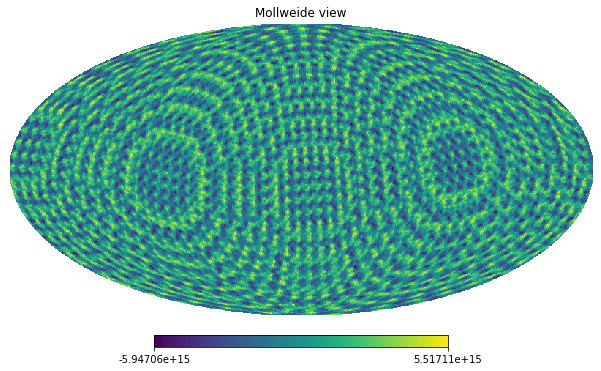

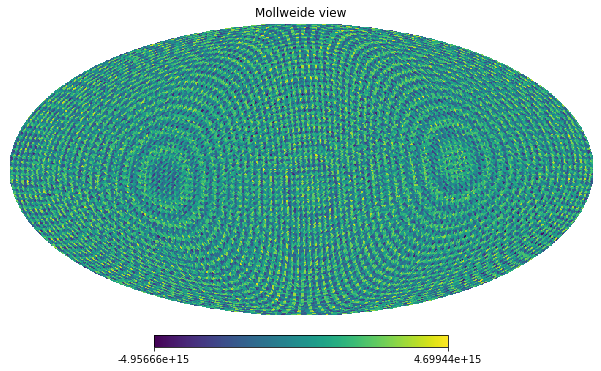

In [338]:
#print(len(ilos))
#hp.mollview(np.roll(ilos,1000)) just for the laughs tried to roll ilos to 
# see if that produced a roation but NOOOOT!
hp.mollview(ilos)
hp.mollview(ilosds)
# there is one scale that is always going to come back its the angular size of the box at the given distance of the slice
# cant really get rid of that can you?
# all you can do is hope that the slices will be sufficently independent to average out that silly signature and given that 
# the furthest slices are weighted by 0...
# yes bbut if the artefacts cancel out well our signal cancel out as well cause that's our signal....
# yeah no thats not the signal the signal appears at those redshifts which have a high 1-beta remember?
# well at least is sort of gets better at higher res
# the main scale showing up in the PS is the frequency corresponding to 360/angularsize of the box at considered distnace
# but maybe we dont care provided we have the correct signal at the distance we're interested in?
# in that we dont necessarily have to have a full sky to get the right power spectrum.
# in fact to have the first peak at ~ 2 degrees we just need 
# one way around this would be to characterize the fields as gaussian fields to be able to randomize but is that 
# description good enough for AM and M?
# and even then can I use that to get what I want? I still need to produce a ginormous cube ...
# if I can characterize the distrivutions of AM and M as gaussiant fields (it probably does not work) 



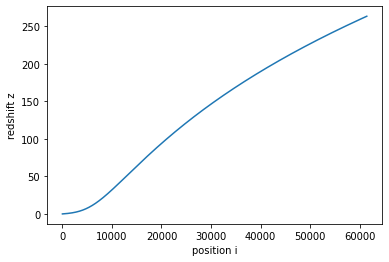

total los length  61440
l1.direction  [0.19919163 0.70030821 0.83255649]
[0 0 0]
2.2690437601296595e-18
dt  [2.00800595e+14 2.00754850e+14 2.00663381e+14 ... 1.88773225e+10
 1.88766839e+10 1.88763646e+10]
c  300000000.0


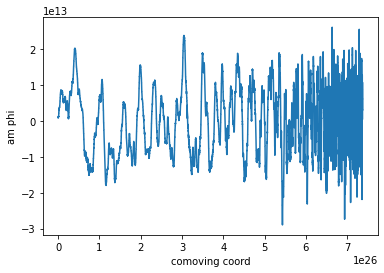

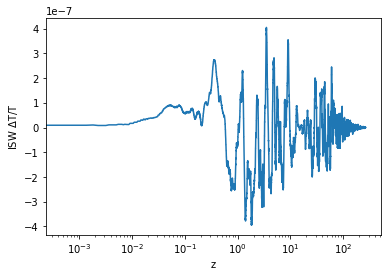

Total ISW along LoS  -0.00031222659567701745


In [544]:
# checking one LoS to see what a the signal comes from
# this is using los2
# and the dphidasphi0 expression

ilos=np.zeros(len(vec))
l1=los2()
#l1.npoints = 3.*grid_size/2 # slight oversampling
#l1.step=0.5/l1.npoints
dist=80. # length of rays in box units v (boxsize ~ 55 Mpc) => thats ~5cGpc
# I use 100 cause I know from trial and error I need lots to get to z=100 because of the shrinking struct scale
l1.npoints=int(dist*3.*grid_size) # slight oversampling here
l1.step=dist/l1.npoints
l1.boxsizez0m=fudgedboxsizez0m
l1.nstart=0
l1.maxz=300.
l1.compute_lincoord()
plt.plot(l1.zs)
plt.xlabel('position i')
plt.ylabel('redshift z')
#plt.yscale('log')
plt.show()
print('total los length ',l1.npoints)

l1.direction=np.asarray([0.3,0.1,0.])
l1.direction=np.random.uniform(0.,1.,size=[3])
print('l1.direction ',l1.direction)

nstart=0 # cause we want all zs
npoints=l1.npoints
allpoints= np.zeros([3,npoints])
allcells= np.zeros([3,npoints],dtype=int)
allvalues= np.zeros(npoints)
allxs=np.zeros(npoints)
rollxyz=np.full([3],0)
#rollxyz=np.random.uniform(0,255,size=[3])
print(rollxyz)
period=256

numbagetlosvalues(aphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlospot=np.copy(allvalues)
numbagetlosvalues(mphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlospot=np.copy(allvalues)
numbagetlosvalues(m_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlosdens=np.copy(allvalues)
numbagetlosvalues(am_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlosdens=np.copy(allvalues)

dphida=dphidasphi0(l1.aexps,alphakpn)*amlospot
# now compute dphi/dt = dphi/da * da/dt where da/dt = 1/H0 in D-M
dphidt=dphida*H0
# Now compute the dt corresponding to each point on the LoS 
# using a -1 there because a=0 <=> time=0 is the end point in our formalism
dt=-np.gradient(l1.times)
# ISW element
dTsT=(-2./c**2)*dphidt*dt

print(H0)
print('dt ',dt)
print('c ',c)

#plt.plot(1./(l1.allsc)-1.,amlospot,label='$\dot{\Phi}$')
plt.plot((l1.allsc),amlospot)#,label='$\dot{\Phi}$')
plt.xlabel('comoving coord')
plt.ylabel('am phi')
#plt.legend()
#plt.xscale('log')
plt.show()


#plt.plot(l1.zs,phidot*l1.aexps)
#plt.show()

plt.plot(l1.zs,dTsT)
plt.xlabel('z')
plt.ylabel('ISW $\Delta$T/T')
plt.xscale('log')
plt.show()

print('Total ISW along LoS ',np.sum(dTsT))

In [553]:
# now compute the skies iwth method 2

def makesky(vec,zmin,zmax):
# where vec is a list of vectors from healpy covering a sphere
    ilos=np.zeros(len(vec))
    l1=los2()
    #l1.npoints = 3.*grid_size/2 # slight oversampling
    #l1.step=0.5/l1.npoints
    dist=80. # length of rays in box units v (boxsize ~ 55 Mpc) => thats ~5cGpc
    # I use 100 cause I know from trial and error I need lots to get to z=100 because of the shrinking struct scale
    l1.npoints=int(dist*3.*grid_size) # slight oversampling here
    l1.step=dist/l1.npoints
    l1.boxsizez0m=fudgedboxsizez0m
    l1.nstart=0
    l1.maxz=300.
    l1.compute_lincoord()

    # iLoS integration bounds
#    zmin=3
#    zmax=4
    ind=np.where((l1.zs>=zmin)&(l1.zs<=zmax))[0]
    nstart=ind[0]
    nend=ind[-1]
    print('zmin zmax',zmin,zmax)
    print('nstart, nend ',nstart,nend)
    npoints=nend-nstart

    losvalues=np.zeros(npoints)
    losxs=np.zeros(npoints)
    print('length of integration support ',npoints)
    allpoints= np.zeros([3,npoints])
    allcells= np.zeros([3,npoints],dtype=int)
    allvalues= np.zeros(npoints)
    allxs=np.zeros(npoints)

    reroll=1 # reroll=0 to keep a given random orientation
    if(reroll==1):
        rollxyz=np.full([3],0)
        rollxyz=np.random.uniform(0,255,size=[3])
        xyzflip=np.random.randint(0,2,size=[3])
        xyzdir=np.full([3],1)
        # manage flip
        for i in range (0,3):
            if (xyzflip[i]==1):
                xyzdir[i]=-1.

    if(reroll==0):
        rollxyz=np.full([3],0)
        xyzdir=np.full([3],1) 

    print('rollxyz ',rollxyz)
    print('xyzdir ',xyzdir)
    period=256
    # setup a random rotation
    rotaxis=vec[np.random.randint(0,len(vec),1)][0]
    angle=np.random.uniform(0,360,size=1)[0]
    #angle=0.
    print('random rotation axis, angle ',rotaxis,angle)
    # generate rotation matrix M0:
    M0 = M(rotaxis, angle)

    nv=len(vec)
    nshowsteps=int(5)
    showsteps=int(nv/nshowsteps)
    for i in range(0,len(vec)):
        if((i%showsteps)==0): 
            print(int(np.rint((i/len(vec))*100.)),"%")
    # get direction from healpy vec:        
        l1.direction=vec[i]
    # apply random rotation of direction:
        if(reroll==1):
            l1.direction=dot(M0,l1.direction)
        numbagetlosvalues(aphi,l1.start,l1.step,nstart,npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz,xyzdir)
    #    ilos[i]=np.sum(allvalues)
        amlospot=np.copy(allvalues)
        dphida=dphidasphi0(l1.aexps[nstart:nend],alphakpn)*amlospot
        # now compute dphi/dt = dphi/da * da/dt where da/dt = 1/H0 in D-M
        dphidt=dphida*H0
        # Now compute the dt corresponding to each point on the LoS 
        # using a -1 there because a=0 <=> time=0 is the end point in our formalism
        dt=-np.gradient(l1.times[nstart:nend])
        # ISW element
        dTsT=(-2./c**2)*dphidt*dt
        ilos[i]=np.sum(dTsT)


    print('done')
    return ilos
#hp.mollview(ilos)


zmin zmax 10.0 10.01
nstart, nend  5683 5685
length of integration support  2
rollxyz  [ 51.48459368 251.43236385  45.22175281]
xyzdir  [-1 -1 -1]
random rotation axis, angle  [-0.75667379  0.61518055  0.22135417] 231.71926785808463
0 %
20 %
40 %
60 %
80 %
100 %
done


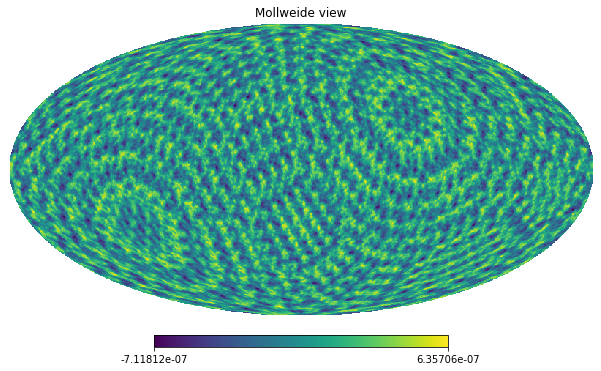

In [611]:
sky=makesky(vec,10.,10.01)
hp.mollview(sky)

In [601]:
# this quickly takes too mcuh ram to store with sufficient angular resolution, will ahve to do that on willow
# or store on disk
# no idea how heavy that is
nvec=np.shape(vec)[0]
zs=np.arange(0.,199.,0.5)
nzs=len(zs)-1
iswsky=np.zeros([nzs,nvec])
print(nzs)
for i in range(nzs):
    iswsky[i,]=makesky(vec,zs[i],zs[i+1])
#sky=makesky(vec,10.,20.)
#hp.mollview(sky)

397
zmin zmax 0.0 0.5
nstart, nend  0 890
length of integration support  890
rollxyz  [248.08881704 206.29139741 196.54212544]
xyzdir  [ 1 -1 -1]
random rotation axis, angle  [ 0.78763147 -0.59926795  0.14322917] 147.27794901618068
0 %
20 %
40 %
60 %
80 %
100 %
done
zmin zmax 0.5 1.0
nstart, nend  891 1523
length of integration support  632
rollxyz  [208.24916205  44.52195538 182.74575   ]
xyzdir  [ 1 -1 -1]
random rotation axis, angle  [-0.48604813  0.79425198 -0.36458333] 120.45928479383765
0 %
20 %
40 %
60 %
80 %


KeyboardInterrupt: 

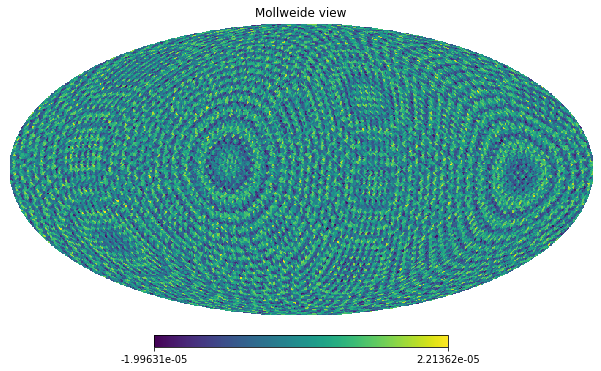

In [599]:
#hp.mollview(iswsky[29,])
sumsky=np.zeros(nvec)
for i in range(0,nzs):
    sumsky=sumsky+iswsky[i,]
hp.mollview(iswsky[99,])
#hp.mollview(sumsky)

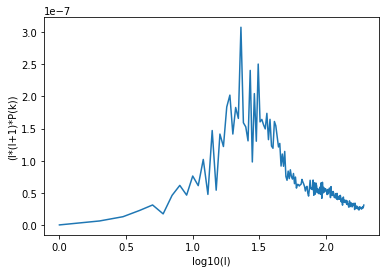

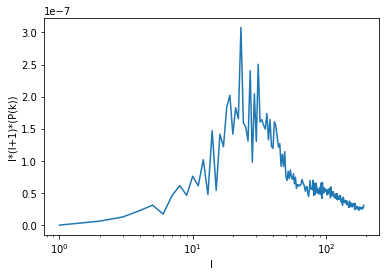

In [588]:
# ANGULAR POWER SPECTRUM!!
#d2 = hp.sphtfunc.anafast( ilos - ilos.mean(),lmax=512)
d2 = hp.sphtfunc.anafast( sumsky - sumsky.mean())

l = np.arange(1,d2.size+1)

plt.plot(np.log10(l),(l*(l+1)*d2))
#plt.plot(np.log10(l),np.log10(l*(l+1)*dsmooth))
plt.xlabel("log10(l)")
plt.ylabel("(l*(l+1)*P(k))")
#plt.plot(d2)
#plt.plot(dsmooth)
plt.show()

plt.plot(l,(l*(l+1)*d2))
#plt.plot(np.log10(l),np.log10(dsmooth))
plt.xlabel("l")
plt.ylabel("l*(l+1)*(P(k))")
#plt.xlim(0.,100)
plt.xscale('log')
#plt.plot(d2)
#plt.plot(dsmooth)
plt.show()

In [ ]:
losxs=np.zeros(l1.npoints)
allvalues= np.zeros(l1.npoints)

# numba - accelerated
ilos=np.zeros(len(vec))
#l1.npoints = 3.*grid_size/2 # slight oversampling
#l1.step=0.5/l1.npoints
dist=25. # length of rays in box units 
l1.npoints=int(dist*6.*grid_size) # slight oversampling
l1.step=dist/l1.npoints
losvalues=np.zeros(l1.npoints)
losxs=np.zeros(l1.npoints)
l1.boxsizez0m=fudgedboxsizez0m
l1.nstart=nstart
l1.compute_lincoord()
print('l1.allxs ',l1.allxs)

npoints=l1.npoints
allpoints= np.zeros([3,npoints])
allcells= np.zeros([3,npoints],dtype=int)
allvalues= np.zeros(npoints)
allxs=np.zeros(npoints)
rollxyz=np.full([3],0)
#rollxyz=np.random.uniform(0,255,size=[3])
print(rollxyz)
period=256

numbagetlosvalues(aphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlospot=np.copy(allvalues)
numbagetlosvalues(mphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlospot=np.copy(allvalues)
numbagetlosvalues(m_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
mlosdens=np.copy(allvalues)
numbagetlosvalues(am_grid,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz)
amlosdens=np.copy(allvalues)

print('allxs from getlosvalues',allxs)
print(allxs * fudgedboxsizez0m)
crdm=allxs * fudgedboxsizez0m # comoving radial distance of each sample
zs=redshift_d_CMR(crdm) # redshift from comoving radial distance
times=gettimez(zs)
aexps=1./(zs+1.)
print(zs)
rho0baram=2. # for antimatter
GSI=6.67e-11 # G in SI
cSI=3.e8# c in SI

dxphis=l1.step*fudgedboxsizez0Mpc*Mpcm*aexps # this is the physical dx corresponding to each segment
#dxphis=1.

plt.figure(figsize=(10, 6))
# to account for the non-unity size of the box, phi has to be corrected by * (dx*a)**2  (the physical size of cells**2)
# cant really work out if it should be dx**2 or L**2....
# weel I think its dx**2. Imagint you have a distribution of delta(i,j,k) and you want to compute the potential 
# via brute force: for cell i,j,k, the potential is the sum of the potentials contributed by all other cells:
# phi(i,j,k)= sum _l,m,n -G rho(l,m,n)dx**3 / ( sqrt((i-l)**2+(j-m)**2+(k-n)**2)*dx)
# so that the dx**2 factor comes out
# also its logical because the laplacian operator is a dx**2 as well
# but at the end I found its a full boxsize**2 as shown in normalization_potential notebook
# then to account for the fact that density increases because of cosmology as a-3 
# but potential normalization goes as boxsize**2/dx**3, boxsize and dx in physical => thats 1/a

# with Gabriel's ansatz for k_peak and beta
# matter
phidot=-(mlospot/aexps)*H(times)*(1-beta(aexps))*(k_peak_norm(1.)/k_peak_norm(aexps))**2
# antimatter: beta=0 because very early on density overdensity settles to about ~2 very early on and evolves only in scale
phidot=-(amlospot/aexps)*H(times)*(1.-0.*beta(aexps))*(k_peak_norm(1.)/k_peak_norm(aexps))**2

print('total deltaT/T')
print(np.sum(phidot*(dxphis/cSI)*(2./cSI**2)))

print('check that the total integration time is indeed the age of the Universe')
print(np.sum(dxphis/cSI)*H0)


#phidot=-amlospot*(1-beta(times))

plt.plot(1./(aexps)-1.,phidot,label='$\dot{\Phi}$')
plt.legend()
plt.xscale('log')
plt.show()

print('fudgeboxsizez0m ',fudgedboxsizez0m)
print('los.boxsizez0m ',l1.boxsizez0m )

print('times after getlosvalues ',len(times),times)
print('times from los class ',len(l1.times),l1.times)

print('crdm after getlosvalues ',len(crdm),crdm)
print('crdm from los class ',len(l1.crdm),l1.crdm)

print('dxphis after getlosvalues ',len(dxphis),dxphis)
print('dxphis from los class ',len(l1.dxphys),l1.dxphys)

# im still not as high as Gabriel but almost there? multuplying by nx**2 would bring me into the few 10s of microK
# but I dont see a justification for that.
# oooor whats missing is a super large and variable beta(t)... hard to have that...

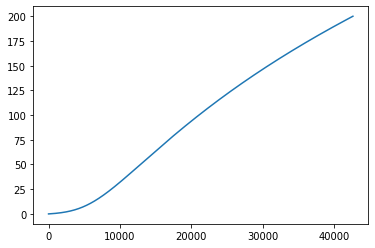

total los length  42639
zmin zmax 190 190.5
nstart, nend  40073 40198
length of integration support  125
rollxyz  [ 50.36989803  69.58607996 182.21296546]
xyzdir  [ 1 -1  1]
random rotation axis, angle  [0.92426249 0.23000952 0.3046875 ] 67.2868322253047
0 %
20 %
40 %
60 %
80 %
100 %
done


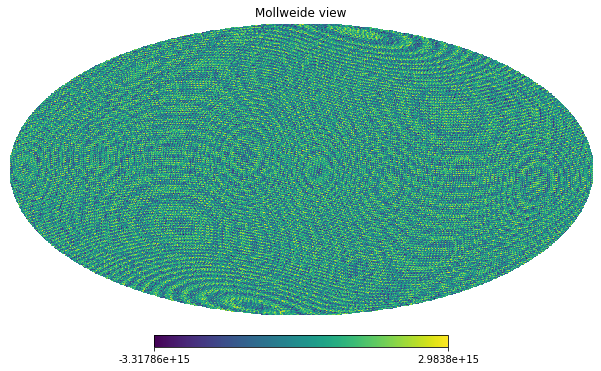

In [362]:
# Using method 2 i.e. los2, where the shrinking of pBAO scale is obtained through a variable substitution:
# the cube coord has a constant step but is not the coomoving coord which must be computed by integration
# numba - accelerated - this is for comupting for the whole sphere
ilos=np.zeros(len(vec))
l1=los2()
#l1.npoints = 3.*grid_size/2 # slight oversampling
#l1.step=0.5/l1.npoints
dist=60. # length of rays in box units v (boxsize ~ 55 Mpc) => thats ~5cGpc
# I use 100 cause I know from trial and error I need lots to get to z=100 because of the shrinking struct scale
l1.npoints=int(dist*3.*grid_size) # slight oversampling here
l1.step=dist/l1.npoints
l1.boxsizez0m=fudgedboxsizez0m
l1.nstart=0
l1.maxz=200.
l1.compute_lincoord()
plt.plot(l1.zs)
plt.xlabel('position i')
plt.ylabel('redshift z')
#plt.yscale('log')
plt.show()
print('total los length ',l1.npoints)

# iLoS integration bounds
zmin=190
zmax=190.5
ind=np.where((l1.zs>=zmin)&(l1.zs<=zmax))[0]
nstart=ind[0]
nend=ind[-1]
print('zmin zmax',zmin,zmax)
print('nstart, nend ',nstart,nend)
npoints=nend-nstart


losvalues=np.zeros(npoints)
losxs=np.zeros(npoints)
print('length of integration support ',npoints)
allpoints= np.zeros([3,npoints])
allcells= np.zeros([3,npoints],dtype=int)
allvalues= np.zeros(npoints)
allxs=np.zeros(npoints)

reroll=1 # reroll=0 to keep a given random orientation
if(reroll==1):
    rollxyz=np.full([3],0)
    rollxyz=np.random.uniform(0,255,size=[3])
    xyzflip=np.random.randint(0,2,size=[3])
    xyzdir=np.full([3],1)
    # manage flip
    for i in range (0,3):
        if (xyzflip[i]==1):
            xyzdir[i]=-1.

if(reroll==0):
    rollxyz=np.full([3],0)
    xyzdir=np.full([3],1) 
        
print('rollxyz ',rollxyz)
print('xyzdir ',xyzdir)
period=256
# setup a random rotation
rotaxis=vec[np.random.randint(0,len(vec),1)][0]
angle=np.random.uniform(0,360,size=1)[0]
#angle=0.
print('random rotation axis, angle ',rotaxis,angle)
# generate rotation matrix M0:
M0 = M(rotaxis, angle)

nv=len(vec)
nshowsteps=int(5)
showsteps=int(nv/nshowsteps)
for i in range(0,len(vec)):
    if((i%showsteps)==0): 
        print(int(np.rint((i/len(vec))*100.)),"%")
# get direction from healpy vec:        
    l1.direction=vec[i]
# apply random rotation of direction:
#    l1.direction=vrotate(l1.direction,rotaxis,angle)
    if(reroll==1):
        l1.direction=dot(M0,l1.direction)
    #getlosvalues(aphi,l1)   # choose phi or aphi
    #numbagetlosvalues(dsaphi,l1.start,l1.step,nstart,l1.npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz,xyzdir)
    #ilosds[i]=np.sum(allvalues)
    numbagetlosvalues(aphi,l1.start,l1.step,nstart,npoints,l1.direction,allpoints,allcells,allvalues,allxs,period,rollxyz,xyzdir)
    ilos[i]=np.sum(allvalues)

print('done')
hp.mollview(ilos)


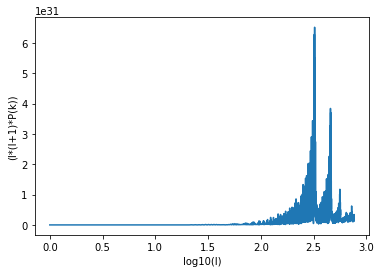

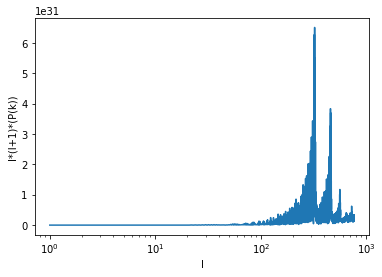

In [360]:
# ANGULAR POWER SPECTRUM!!
#d2 = hp.sphtfunc.anafast( ilos - ilos.mean(),lmax=512)
d2 = hp.sphtfunc.anafast( ilos - ilos.mean())

l = np.arange(1,d2.size+1)

plt.plot(np.log10(l),(l*(l+1)*d2))
#plt.plot(np.log10(l),np.log10(l*(l+1)*dsmooth))
plt.xlabel("log10(l)")
plt.ylabel("(l*(l+1)*P(k))")
#plt.plot(d2)
#plt.plot(dsmooth)
plt.show()

plt.plot(l,(l*(l+1)*d2))
#plt.plot(np.log10(l),np.log10(dsmooth))
plt.xlabel("l")
plt.ylabel("l*(l+1)*(P(k))")
#plt.xlim(0.,100)
plt.xscale('log')
#plt.plot(d2)
#plt.plot(dsmooth)
plt.show()

36
(256, 256, 256)


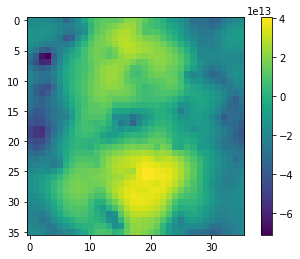

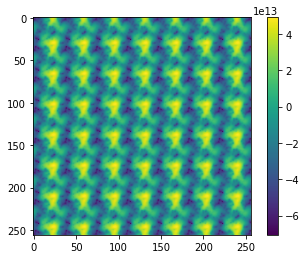

In [113]:
# YES THIS IS THE ONE!!
# tiling strategy that will always work, but DOES NOT PRODUCE A periodic tiled cube
# the non-periodic aspect should not be a problem as we only use about 0.5 of the lenfth of each cube.
# yeah but since loss start and stop at random locations in the cube some loss are going to cross non-continuous features....
# that may potentially affect up to half of the LoSs in every shell
# is that worse that the non-continuity when changing shell? no idea...
# to make it better one woudl have to use for each shell a cube of changing size...
# thats not a big thing...
# also to take into account the fact that beams cover a larger and larger number of cells in area 
# one would need to use cubes of diminishing resolution

import skimage.transform as skt

dsfactor=7.  # downscale factor
newsize=int(grid_size/dsfactor) # yes its brutal
if(newsize==0):
    newsize=1
print(newsize)
#resized= skt.resize(mphi,(newsize,newsize,newsize))
resized= skt.resize_local_mean(mphi,(newsize,newsize,newsize))
reslen=np.shape(resized)[1]
tile=np.pad(resized,((256-reslen,0),(256-reslen,0),(256-reslen,0)),mode='wrap')
print(np.shape(tile))

#tile=resize(resized,(256,256,256),mode='wrap')
plt.imshow(resized[:,:,0])
plt.colorbar()
plt.show()
plt.imshow(tile[:,:,0])
plt.colorbar()
plt.show()

In [ ]:
# this will only work for good dsfactors in powers of 2
dsfactor=3
ds=downscale_local_mean(mphi,(dsfactor,dsfactor,dsfactor))
#newsize=
plt.imshow(ds[:,:,0])
plt.colorbar()
plt.show()
print(np.where(ds==0))
dsx=np.shape(ds)[1]
print(dsx)
tile=np.pad(ds,((128-dsx,128),(128-dsx,128),(128-dsx,128)),mode='wrap')
print(np.shape(tile))
plt.figure(figsize=(10,10))                      
plt.imshow(tile[:,:,0])
plt.colorbar()
plt.show()

5.859375


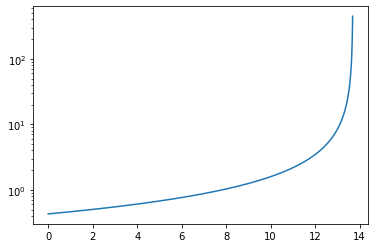

In [75]:
# check size of steps for the time sampling used:
dists=d_CMR(redshift(times))/Mpcm
plt.plot(lookbacktimes[:-1]/(1.e9*yrinsec),dists[1:]-dists[:-1])
plt.yscale('log')
# thats in cMpc, so anything larger than 1.5cGpc/256 is too large
print(1500./256.)
# so, need a smarter way to sample the LoS position.
# the logical way to do is take the d_CMR positions and turn them into times
# => reciprocal of d_CMR

SOME EARLY NOTES I TOOK BEFORE WE STARTED USING EQ 9 OF WATSON 2014

NB: there is a $4 \pi$ missing in the poisson equatino used here?

Lets define adimenstional potential $\phi={\Phi}/{\bar{\rho}G}$ and overdensity $\delta=\rho/\bar{\rho}$ so that

$ \Delta \phi = - \delta$

We also have $\bar{\rho} = \rho_0 / a^3$

We also want to separate the time and position dependencies for $\delta$ so that

$\delta(t,x) = D(t) \delta_0(x) $

With this separation, we have: 

$ \dot{\phi} = \frac{d D}{dt} \phi_0 \, ,$

where

$ \Delta \phi_0 = - \delta_0$

So that the potential time derivative reads

$\dot{\Phi} = \bar{\rho}_0 G \phi_0 \frac{d}{dt}(D/a^3) $

Developing the time derivative in the last term gives

$\dot{\Phi} = \bar{\rho}_0 G \phi_0 (   \frac{\dot{D}}{a^3 }- \frac{3 \dot{a}}{a^4} D) $

D for antimatter could be a constant 1 give how little AM evolves.
and $\bar{\rho}_0=2$ can't be too wrong considering how dilute it is and takes about 50$\%$ of total volume

also, $\dot{a}=1/H_0$


Now we also need to account for the fact that the power spectrum of the potential evolves with redshift, and as a result sees its characteristic scale become shorter at early times. For this we assume the ansatz below on the wavenumber of the potential, guided by 1D sims of Bernardi & Chardin. See formula for kpeak_am below).
The potential is therefore modulated by $(k_0/k(z))^2$, describing the decreasing amplitude of the gravitational potential as structures (wavenumbers) get smaller (higher).

In the analysis of the terms which will be involved, one must also consider the time element $dt$. 
Indeed, for numerical consistency our integration steps remain tied to the cells of the computational domain. 
In Dirac-Milne, one can show that 
${\rm dt} = -\frac{H_0^2}{c}a {\rm dx} \, , $
where dx is the comoving radial distance element.

So the final integrand is:

${\rm d} \dot{\phi}$ = 3 $\bar{\rho}_0 G \frac{\phi_0}{a^3} \frac{H_0}{c} \left(\frac{k_0}{k} \right)^2 {\rm dx} \, , $
where dx is the comoving radial distance 

OK Im just missing the $2/c^2$ factor at this stage

Problem: with this approach most of the ISW signal is produced by the very young z=100-1000 universe. So the assumption D=1 is problematic. Indeed, even if structures form fast, formation is not instantaneous. So that fornation timescale must appear through a functional form for D. Will have to take an ansatz again.


OK OK OK so I forgot the dk/dt term lets start again:

We have 

$\Phi =  \bar{\rho}_0 G \phi_0 \frac{D}{a^3} \left(\frac{k_0}{k}\right)^2 \, ,$

where only the 2 rightmost terms are time-dependent.
Hence, derivating everything carefully and regrouping:

$\dot{\Phi} = \frac{\bar{\rho}_0}{a^3}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( \frac{\rm{d} D}{\rm{d} t} - \frac{3D \dot{a}}{a} - \frac{2D}{k} \frac{\rm{d} k}{\rm{d} t} \right)  $

Which can also be written to express the element of potential ${\rm d}\Phi$:

${\rm d}\Phi = \frac{\bar{\rho}_0}{a^3}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( \frac{\rm{d} D}{\rm{d} t} - \frac{3D \dot{a}}{a} - \frac{2D}{k} \frac{\rm{d} k}{\rm{d} t} \right)  {\rm dt}$

Now In Dirac-Milne, one can show that (using the formula for comiving radial distance and injectimg a =t/H0):

${\rm dt} = -\frac{H_0^2}{c}a {\rm dx} \, , $
where dx is the comoving radial distance element.

So the element of potential ${\rm d}\Phi$ becomes:

${\rm d}\Phi = -\frac{H_0^2}{c} \frac{\bar{\rho}_0}{a^2}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( \frac{\rm{d} D}{\rm{d} t} - \frac{3D \dot{a}}{a} - \frac{2D}{k} \frac{\rm{d} k}{\rm{d} t} \right)  {\rm dx}$

the first term in partentheses dD/dt =0 since we assume D=1

The second term has to do with adiabatic expansion. Since $a=t/H_0$ we have $\dot{a}=1/H_0$

So the second term reads:

$d{\Phi}_{ad} = -\frac{H_0}{c} \frac{\bar{\rho}_0}{a^3}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( -3 D  \right) dx$

For the 3rd term (the structuration term), we compute numerically not dk/dt but dk/da, so that the element of potential reads

$d{\Phi}_{str} = -\frac{H_0^2}{c} \frac{\bar{\rho}_0}{a^2}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( -2 \frac{D}{k}  \frac{dk}{da} \frac{da}{dt}  \right) dx$

and since da/dt=1/H0 we have:
 
 $d{\Phi}_{str} = -\frac{H_0}{c} \frac{\bar{\rho}_0}{a^2}G \phi_0 \left(\frac{k_0}{k}\right)^2 \left( -2 \frac{D}{k}  \frac{dk}{da}   \right) dx$
 


how do I compute dk/dt with my interpoland? easily done with univariate spline which has a derivative

$$

$$

!a


In [101]:
# NOTES
#notes gabriel for beta(t)
# Paramétrisation de variation de k_peak comoving selon Manfredi et al. (2020)
k_peak_norm = math.exp(-alpha * math.log(a_cur)**3)
# d_cmr = comoving radial distance en unité longueur de Hubble
# BAO_length : longueur BAO en unité longueur de Hubble (typiquement 0.035 pour 150 Mpc)
# a_cur : current value of scale factor (a = 1 now)
d_cmr = d_cmr + BAO_length/k_peak_norm
a_cur = math.exp(-d_cmr)
isw_ampl += abs(all_cl_spectra[i] * (1. - 6. * alpha * math.log(a_cur)**2)/(a_cur * k_peak_norm**3))

# more notes for normalization of ISW amplitude:
#Facteur de normalisation pour l’output 10 que j’avais transféré sur Willow.

#La normalisation dépend évidemment de la taille que l’on suppose pour la boîte de simulation, mais si on suppose que la boîte, en fonction du nombre de vagues antimatière de l’ordre d’une quinzaine, est d’environ 2 Gpc (une quinzaine de vagues à l’échelle BAO), on peut calculer facilement le volume de la boîte, et donc la masse de matière, égale à la masse d’antimatière, présente dans la boîte, la densité à notre époque étant toujours d’environ 3.2 nucléons par mètre cube, soit environ 5.37 10^{-27} kg/m^3.

#Je calcule ensuite la masse totale de matière ou d’antimatière (chacune sur 50% du volume de la boîte), et cela me donne : la normalisation de longueur unité de la boîte de simulation, et de masse unité pour une particule, étant donné qu’il y a 2^{24}/2 = 2^{23} de matière ou d’antimatière (en nombre égal) dans la boîte.

#Pour le facteur de normalisation approximatif du potentiel calculé par la simulation GM/(c^2 r), je trouve 5.67 10^{-9} pour ce facteur, et si on veut raisonner en microK, environ 1.54 10^{-2}. La plus grosse incertitude vient de l’échelle de distance, c’est-à-dire le nombre de vagues BAO que l’on met dans la boîte.
#Pour une taille de boîte (pour le même output 10) de n Gpc au lieu de 2, le facteur de normalisation devient : 
#5.67 10^{-9} x (n/2)**2 en potentiel réduit, et 1.54 10^{-2} x (n/2)**2 en microK.

#Il sera important de vérifier ce calcul.


array([ 1.00023029,  1.02376434,  1.04785213,  1.07250667,  1.09774129,
        1.12356965,  1.15000572,  1.17706379,  1.2047585 ,  1.23310483,
        1.26211811,  1.29181404,  1.32220867,  1.35331844,  1.38516019,
        1.41775112,  1.45110888,  1.4852515 ,  1.52019745,  1.55596563,
        1.59257539,  1.63004652,  1.6683993 ,  1.70765447,  1.74783326,
        1.7889574 ,  1.83104914,  1.87413124,  1.918227  ,  1.96336028,
        2.00955548,  2.05683759,  2.10523218,  2.15476543,  2.20546414,
        2.25735571,  2.31046822,  2.3648304 ,  2.42047165,  2.47742206,
        2.53571243,  2.5953743 ,  2.65643993,  2.71894235,  2.78291537,
        2.84839359,  2.91541242,  2.98400812,  3.05421777,  3.12607937,
        3.19963177,  3.27491476,  3.35196905,  3.43083633,  3.51155925,
        3.59418146,  3.67874767,  3.7653036 ,  3.85389608,  3.94457302,
        4.03738346,  4.13237761,  4.22960684,  4.32912375,  4.43098214,
        4.53523713,  4.6419451 ,  4.75116376,  4.86295219,  4.97

In [ ]:
import numpy as np
import scipy.ndimage

plt.imshow(scipy.ndimage.zoom(mphi, 0.1, order=0)[:,:,0])
plt.colorbar()

# ues thats great but it will only take so far ... cant get below k/k0 < 1e-2 with this, and I need to get all the way to 1e-3
# Im going to have to build it directly into the interpolation function... bloody hell I dont like that...
# but this way I will ever only hold 1 cube in memory

# otherwise I can also zoom out by 0.1, pad back to to 256^3, and again all the way down to 0.001 or even 0.0001
# yes that would also work

In [ ]:
def rebin(a,factor):
    


In [94]:
np.shape(tile)
print(np.shape(mphi))
ca=congrid(tile,[256,256,256])

(256, 256, 256)


TypeError: can only concatenate list (not "range") to list

In [ ]:
#nb/ngamma=8e-9 en Dirac MIlne 
# ngamma=427 ph/cm^3 
# => garder la densite de matiere et antimatiere fixees
# back to basics: why is there no CMB in Dirac-Milne?
# because there is no DM to seed the variations?

In [ ]:
# Paramétrisation de variation de k_peak comoving selon Manfredi et al. (2020)
        k_peak_norm = math.exp(-alpha * math.log(a_cur)**3)
# d_cmr = comoving radial distance en unité longueur de Hubble
# BAO_length : longueur BAO en unité longueur de Hubble (typiquement 0.035 pour 150 Mpc)
# a_cur : current value of scale factor (a = 1 now)
        d_cmr = d_cmr + BAO_length/k_peak_norm
        a_cur = math.exp(-d_cmr)
        isw_ampl += abs(all_cl_spectra[i] * (1. - 6. * alpha * math.log(a_cur)**2)/(a_cur * k_peak_norm**3))

        
def beta(a):
    alphakpn=0.021
    # now the latter one is full Gabriel
    return 6*alphakpn*np.log(a)**2/(a*(k_peak_norm(a))**3)


In [99]:
2.*np.pi/np.arctan(1./1.5) 

10.685641984017673

In [65]:
np.sin(np.pi/2.)

1.0

In [78]:
360./1./256./10.


0.140625

In [87]:
def rotate_map(hmap, rot_theta, rot_phi):
    """
    Take hmap (a healpix map array) and return another healpix map array 
    which is ordered such that it has been rotated in (theta, phi) by the 
    amounts given.
    """
    nside = hp.npix2nside(len(hmap))

    # Get theta, phi for non-rotated map
    t,p = hp.pix2ang(nside, np.arange(hp.nside2npix(nside))) #theta, phi

    # Define a rotator
    r = hp.Rotator(deg=False, rot=[rot_phi,rot_theta])

    # Get theta, phi under rotated co-ordinates
    trot, prot = r(t,p)

    # Interpolate map onto these co-ordinates
    rot_map = hp.get_interp_val(hmap, trot, prot)

    return rot_map
hp.mollview(np.log(rotate_map(ilos, np.pi/4,np.pi/2)))

<ipython-input-95-f1ab2a8d7bb5>:1: RuntimeWarning: invalid value encountered in log
  hp.mollview(np.log(rotate_map(ilos, np.pi/4,np.pi/2)))


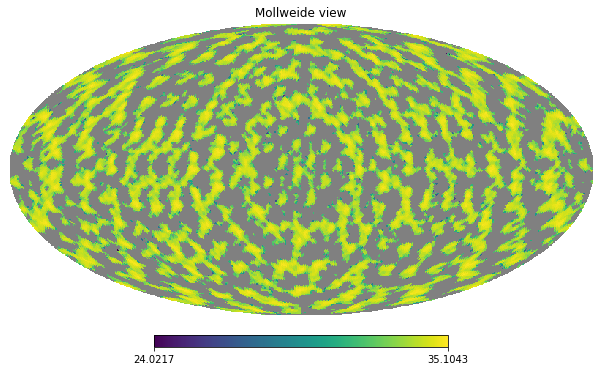

In [95]:
hp.mollview(np.log(rotate_map(ilos, np.pi/4,np.pi/2)))

In [170]:
def random_rotation_3d(batch, max_angle):
    """ Randomly rotate an image by a random angle (-max_angle, max_angle).

    Arguments:
    max_angle: `float`. The maximum rotation angle.

    Returns:
    batch of rotated 3D images
    """
    size = batch.shape
    batch = np.squeeze(batch)
    batch_rot = np.zeros(batch.shape)
    for i in range(batch.shape[0]):
#        if bool(np.random.getrandbits(1)):
        if bool(np.random.bit_generator.randbits(1)):
#            image1 = np.squeeze(batch[i])
            image1=batch
            # rotate along z-axis
            angle = np.random.uniform(-max_angle, max_angle)
            image2 = scipy.ndimage.interpolation.rotate(image1, angle, axes=(0, 1), reshape=False)

            # rotate along y-axis
            angle = np.random.uniform(-max_angle, max_angle)
            image3 = scipy.ndimage.interpolation.rotate(image2, angle, axes=(0, 2), reshape=False)

            # rotate along x-axis
            angle = np.random.uniform(-max_angle, max_angle)
            batch_rot[i] = scipy.ndimage.interpolation.rotate(image3, angle, axes=(1, 2), reshape=False)
            #                print(i)
        else:
            batch_rot[i] = batch[i]
    return batch_rot.reshape(size)

rotated=random_rotation_3d(aphi,180)


ValueError: could not broadcast input array from shape (256,256,256) into shape (256,256)

In [164]:
np.random.bit_generator.randbits(1)

0

In [216]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

#v, axis, theta = [3,5,0], [4,4,1], np.pi
v, axis, theta = [1,0,0], [0,0,1], np.pi/2

M0 = M(axis, theta)

print(dot(M0,v))
# [ 2.74911638  4.77180932  1.91629719]

[0. 1. 0.]


In [ ]:
from numpy import cross, eye, dot
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(cross(eye(3), axis/norm(axis)*theta))

def rotate(v,axis,theta):
    M0 = M(axis, theta)
    return dot(M0,v)
           

#v, axis, theta = [3,5,0], [4,4,1], np.pi
v, axis, theta = [1,0,0], [0,0,1], np.pi/2

M0 = M(axis, theta)

print(dot(M0,v))

In [ ]:
# THIS BLOCK SHOWS HOW TO ROTATE CUBE AND CHECK ITS WHAT YOU WANT
import numpy as np
import scipy
from scipy.ndimage.interpolation import rotate
# some info on matrix roattion here:
# https://stackoverflow.com/questions/49097667/how-can-i-rotate-a-3d-array-nxnxn-by-x-degrees-around-x-y-and-z-axes
#x = np.random.randint(800, 1000, size=[100, 100, 3])
if(0):
    x = np.random.normal(size=[256, 256,256])
    x[30:40,50,:]=10.
    x[50,40:60,:]=-10.
if(1):
    x=np.copy(aphi)


#rotated = rotate(x, angle=20,reshape=False)
#rotated=scipy.ndimage.interpolation.rotate(x,30,axes=(2,0),reshape=False,mode='wrap')
rotated=scipy.ndimage.interpolation.rotate(x,60,axes=(2,0),reshape=False,mode='wrap')
# one can get a full rotation aroudn 3 axes by doing 3 successive rotations
# NB: axes is the list of axes which define the plane of rotation.
# axes = (0,1) mean the plane contains x and y, so the AXIS of rotation is along z!! 
# axes= (1,2) mean the plane contains y and z, so the AXIS of rotation is along x!!
# And then careful, plt.imshow is TRANSPOSED!
# not super intuitive
print(np.shape(x))
plt.imshow(x[128,:,:].T)
plt.show()
plt.imshow(rotated[128,:,:].T)
print(np.shape(rotated))
plt.show()
plt.imshow(rotated[:,128,:].T)
plt.show()
plt.imshow(rotated[:,:,128].T)
plt.show()

# altogether seems legit
# the interpolation looks bad but what can you do?
# gooing to need to rotate the cube every.... period so every 256 cells or so
# so store a bunch of randomly rotaed potentials in a list, NO a 4d matrix, otherwise numba will go nuts.
# and pass that 4d matrix to getpotential, and a new argument to know when to switch from one to the next
# in first approach this could be jsut the period

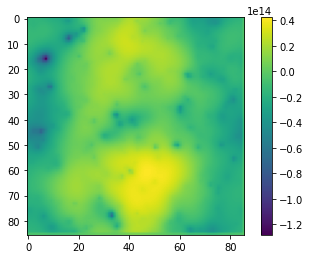

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))
86
(256, 256, 256)


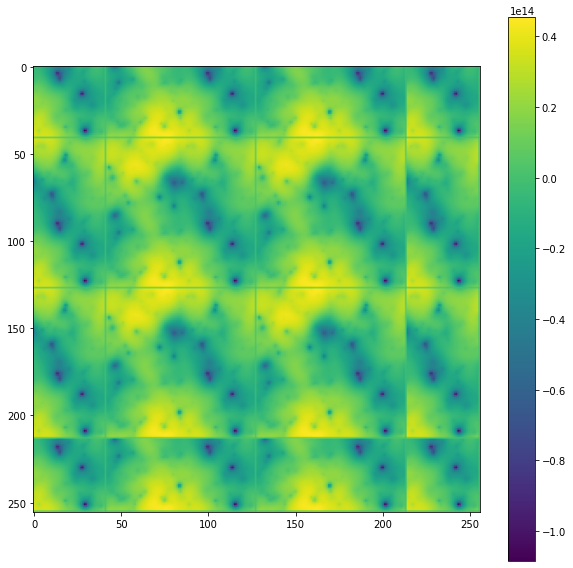

In [90]:
# this will only work for good dsfactors in powers of 2
dsfactor=3
ds=downscale_local_mean(mphi,(dsfactor,dsfactor,dsfactor))
#newsize=
plt.imshow(ds[:,:,0])
plt.colorbar()
plt.show()
print(np.where(ds==0))
dsx=np.shape(ds)[1]
print(dsx)
tile=np.pad(ds,((128-dsx,128),(128-dsx,128),(128-dsx,128)),mode='wrap')
print(np.shape(tile))
plt.figure(figsize=(10,10))                      
plt.imshow(tile[:,:,0])
plt.colorbar()
plt.show()

In [369]:
from sympy import diff, sin, exp, log
from sympy.abc import x,y 
expr=x*sin(x*x)+1
expr
diff(expr,x)

2*x**2*cos(x**2) + sin(x**2)

exp(-alpha*log(a)**3)
1
exp(2*alpha*log(a)**3)/a
6*alpha*exp(2*alpha*log(a)**3)*log(a)**2/a**2 - exp(2*alpha*log(a)**3)/a**2


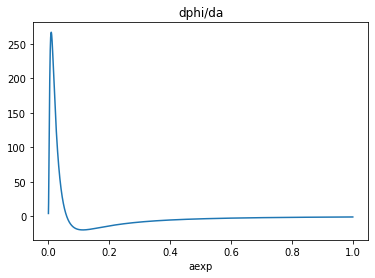

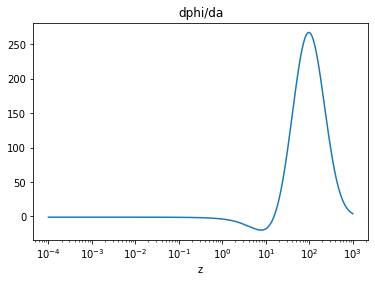

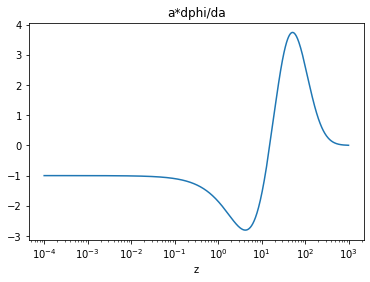

In [463]:
from sympy.abc import x,y 
from sympy import diff, sin, exp, log
import numpy
from sympy.utilities.lambdify import lambdify
from sympy import symbols

# compute dphi/da

#alphakpn=0.0213
alphakpn= symbols("alpha")
a=symbols("a")
expr = exp(-alphakpn * log(a)**3)
print(expr)
print(expr.subs(a,1.))
# We have something like phi ~ phi0 * (1/a * 1/k^2)
# so the drivative of that parenthesis wrt a or time is our 1-beta
expr2 = (1/a)*(1/expr)**2
print(expr2)
ddx=diff(expr2,a)
print(ddx)
dphida = lambdify((a, alphakpn), ddx, "numpy")
alphakpn=0.0213
aexps=np.arange(0.001,1.,1.e-4)
plt.plot(aexps,dphida(aexps,alphakpn))
#plt.xscale('log')
plt.title('dphi/da')
plt.xlabel('aexp')
plt.show()

plt.plot(1./aexps-1.,dphida(aexps,alphakpn))
plt.xscale('log')
plt.title('dphi/da')
plt.xlabel('z')
plt.show()


# this seems to indicate that early times have a much stronger weight than late times.
# however this does not account for the fact that the time spent by the photon in each shell is proportional to a
# so to have a better grasp of the weight of each shell, one needs to multiply the result by a, which gives:

plt.plot(1./aexps-1.,aexps*dphida(aexps,alphakpn))
plt.xscale('log')
plt.title('a*dphi/da')
plt.xlabel('z')
plt.show()

# this last *a term will appear when integrating along the LoS





In [442]:

# tprint(np.arange(1.,0.,-1.e-3))

[1.00e+00 9.99e-01 9.98e-01 9.97e-01 9.96e-01 9.95e-01 9.94e-01 9.93e-01
 9.92e-01 9.91e-01 9.90e-01 9.89e-01 9.88e-01 9.87e-01 9.86e-01 9.85e-01
 9.84e-01 9.83e-01 9.82e-01 9.81e-01 9.80e-01 9.79e-01 9.78e-01 9.77e-01
 9.76e-01 9.75e-01 9.74e-01 9.73e-01 9.72e-01 9.71e-01 9.70e-01 9.69e-01
 9.68e-01 9.67e-01 9.66e-01 9.65e-01 9.64e-01 9.63e-01 9.62e-01 9.61e-01
 9.60e-01 9.59e-01 9.58e-01 9.57e-01 9.56e-01 9.55e-01 9.54e-01 9.53e-01
 9.52e-01 9.51e-01 9.50e-01 9.49e-01 9.48e-01 9.47e-01 9.46e-01 9.45e-01
 9.44e-01 9.43e-01 9.42e-01 9.41e-01 9.40e-01 9.39e-01 9.38e-01 9.37e-01
 9.36e-01 9.35e-01 9.34e-01 9.33e-01 9.32e-01 9.31e-01 9.30e-01 9.29e-01
 9.28e-01 9.27e-01 9.26e-01 9.25e-01 9.24e-01 9.23e-01 9.22e-01 9.21e-01
 9.20e-01 9.19e-01 9.18e-01 9.17e-01 9.16e-01 9.15e-01 9.14e-01 9.13e-01
 9.12e-01 9.11e-01 9.10e-01 9.09e-01 9.08e-01 9.07e-01 9.06e-01 9.05e-01
 9.04e-01 9.03e-01 9.02e-01 9.01e-01 9.00e-01 8.99e-01 8.98e-01 8.97e-01
 8.96e-01 8.95e-01 8.94e-01 8.93e-01 8.92e-01 8.91e